## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()
results_combo = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

## Summary statistics

In [2]:
results_combo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
Drug = results_combo["Drug Regimen"].unique()
Drug

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#results_combo_stats = results_combo.groupby("Drug Regimen").describe()
tumor = results_combo.set_index('Drug Regimen')['Tumor Volume (mm3)']
tumor_stats = tumor.groupby("Drug Regimen").describe()
#tumor_stats


#Var of Tumor
tumor_var = tumor.groupby("Drug Regimen").var()

#StD of Tumor
tumor_sem = tumor.groupby("Drug Regimen").sem()




tumor_stats


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [5]:
#tumor_stats.get_group("Capomulin") 
tumor_status2 = pd.concat([tumor_stats, tumor_var.rename('variance'),tumor_sem.rename('SEM')], axis=1)
#, columns = ['count','mean','std','min','25%', 'median','75%','max','variance','SEM']

tumor_status3 = tumor_status2.drop(columns=['count','min','25%','75%','max'])
tumor_status4 = tumor_status3.rename(columns = {"50%":"median"})
tumor_status4

,mean,std,median,variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.322552,6.507770,50.854632,42.351070,0.512884
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar plots

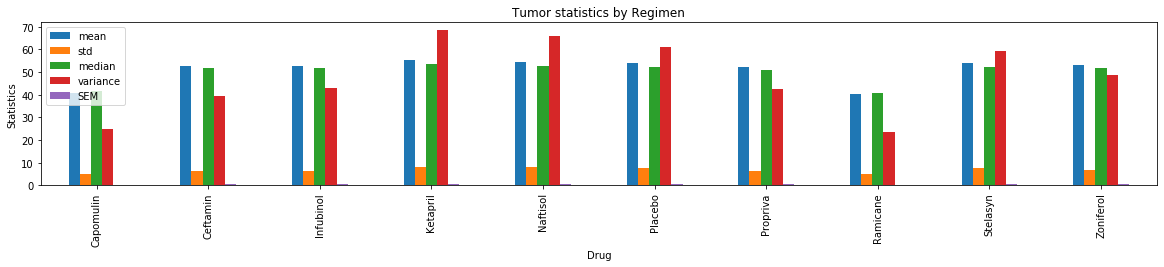

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_status4.plot(kind="bar", figsize=(20,3))

#tumor_status4.set_xticklabels(tumor_status4)

plt.title("Tumor statistics by Regimen")
plt.xlabel("Drug")
plt.ylabel("Statistics")


plt.show()

Text(0, 0.5, 'Statistics')

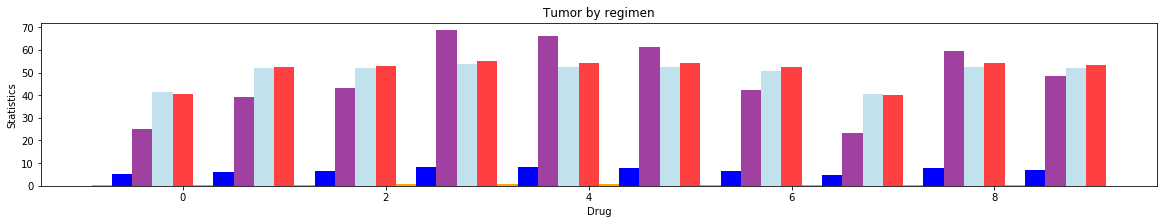

In [98]:
x_axis = np.arange(len(Drug))
stats = [value for value in x_axis]

width = 0.2

plt.figure(figsize=(20,3))
plt.bar(x_axis, tumor_stats["mean"], width, color='r', alpha=0.75, align="center")
plt.bar(x_axis - width, tumor_stats["50%"], width, color='lightblue', alpha=0.75, align="center")
plt.bar(x_axis - (width *2), tumor_var, width, color='purple', alpha=0.75, align="center")
plt.bar(x_axis - (width* 3), tumor_stats["std"], width, color='blue', alpha=1, align="center")
plt.bar(x_axis- (width* 4), tumor_sem, width, color='orange', alpha=1, align="center")


#Labels
plt.title("Tumor by regimen")
plt.xlabel("Drug")
plt.ylabel("Statistics")

#plt.xticks(stats, ('Capomulin', 'Ceftamin', 'Infubinol','Capomulin', 'Ceftamin', 'Infubinol''Capomulin', 'Ceftamin', 'Infubinol', 'Infubinol')
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])


In [8]:
#x_axis = np.arange(len(Drug))
#stats = [value for value in x_axis]

#width = 0.2

#plt.figure(figsize=(20,3))
#plt.bar(x_axis, tumor_sem, width, color='orange', alpha=1, align="center")

#Labels
#plt.title("Tumor by SEM")
#plt.xlabel("Drug")
#plt.ylabel("Statistics")
#plt.xticks(Drug)
#ax.set_xticklabels( ('Capomulin', 'G2', 'G3', 'G4', 'G5') )

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


## Pie plots

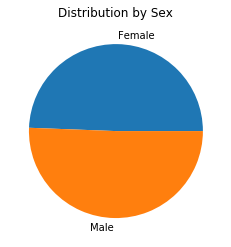

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = results_combo.set_index('Sex')['Mouse ID']
gender_groups = mice_sex.groupby('Sex').count()
gender_groups.head()

gender_groups.plot(kind="pie")

plt.title("Distribution by Sex")
#plt.xlabel("Count")
plt.ylabel("")


plt.show()

In [11]:
gender_groups.head()

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

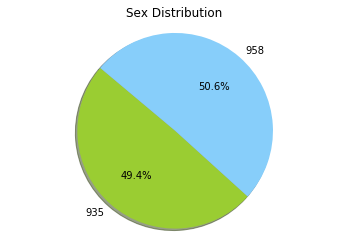

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["yellowgreen","lightskyblue"]
plt.title("Sex Distribution")

plt.pie(gender_groups, labels=gender_groups, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#Add tickets to show which one is female vs male
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
results_combo.head(20)
final = results_Capomulin = results_combo.loc[results_combo["Timepoint"] == 45]
#Filter down for 4 Drug Regimen
final4 = final.loc[(final["Drug Regimen"] =="Capomulin") | (final["Drug Regimen"] =="Ramicane") |
          (final["Drug Regimen"] =="Infubinol") | (final["Drug Regimen"] == "Ceftamin")]

final.head(20)
#Sort to have lowest values at the top
final_volume = final4[["Drug Regimen",'Tumor Volume (mm3)']].sort_values('Tumor Volume (mm3)')
final_volume.head(20)

#***************Need to know why this is not working to identify the IQR**************
quartiles = final_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of Tumor treatment is: {lowerq}")
#print(f"The upper quartile of Tumor treatment is: {upperq}")
#print(f"The interquartile range of Tumor treatment is: {iqr}")
#print(f"The the median of Tumor treatment is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")


KeyError: 0.25

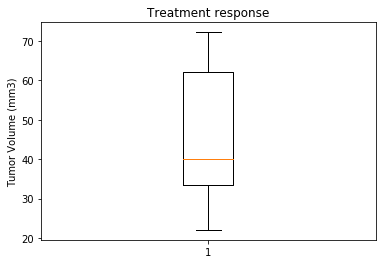

In [138]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment response')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_volume['Tumor Volume (mm3)'])
plt.show()

## Line and scatter plots

In [104]:
#results_combo[['Drug Regimen''Tumor Volume (mm3)']]

#results_Capomulin = results_combo.loc[results_combo["Drug Regimen"] == "Capomulin"]
#Capomulin_time_v = Capomulin[["Drug Regimen",'Timepoint','Tumor Volume (mm3)']]
#Capomulin = results_Capomulin.groupby(["Drug Regimen","Timepoint", "Tumor Volume (mm3)"])
#Capomulin_time_v = Capomulin[['Timepoint','Tumor Volume (mm3)']]

#meta_response_error = full_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
#Capomulin_time_v.head(10)

#results_Capomulin.set_index("results_Capomulin")["Drug Regimen","Timepoint","Tumor Volume (mm3)"]
#Timepoint = results_Capomulin["Timepoint"]
#Timepoint.head()
#tumor_status4 = Capomulin_time_v.rename(columns = {"50%":"median"})
#Capomulin_time_v.head()


results_combo.head()
#Only bring in Capomulin
results_Capomulin = results_combo.loc[results_combo["Drug Regimen"] == "Capomulin"]
results_Capomulin.head()
results_Capomulin["Timepoint"].head(20)
#results_Capomulin["Tumor Volume (mm3)"].head(10)

10     0
11     5
12    10
13    15
14    20
15    25
16    30
17    35
18    40
19    45
20     0
21     5
22    10
23    15
24    20
25    25
26    30
27    35
28    40
29    45
Name: Timepoint, dtype: int64

In [90]:
x_axis = np.arange(0,45,5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40])

TypeError: unhashable type: 'numpy.ndarray'

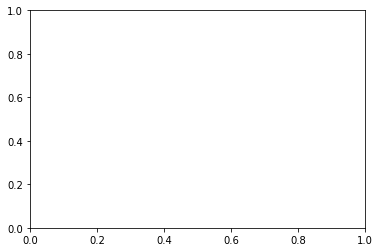

In [102]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


#time_point, = plt.plot(results_Capomulin["Timepoint"], results_Capomulin["Tumor Volume (mm3)"], marker="+",color="blue", linewidth=1, label="Timepoint")
time_point, = plt.plot(x_axis, results_Capomulin, marker="+",color="blue", linewidth=1, label="Timepoint")

#Capomulin.plot(kind="scatter", x="Tumor Volume (mm3)", y="Timepoint", grid=True, figsize=(8,8),
#              title="Timepoint vs Tumor Volume")
#plt.show()

# Plot the world average as a line chart
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
#country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
#                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

#fahrenheit, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Fahreneit")
#celcius, = plt.plot(x_axis, points_C, marker="s", color="Red", linewidth=1, label="Celcius")


#plt.scatter(results_Capomulin['Timepoint'],results_Capomulin['Tumor Volume (mm3)'])
#clb = plt.colorbar()
#plt.xlabel("Tumor Volume (mm3)")
#plt.ylabel("Timepoint")
#clb.set_label("Median Income")
#plt.show()


In [94]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#results_Capomulin.head()
#Capomulin_weight = results_Capomulin[['Weight (g)','Tumor Volume (mm3)']]

# Calculate mean of Tumor Volume per drug
Capomulin_weight = pd.DataFrame(results_Capomulin.groupby(['Drug', 'Weight (g)'])['Tumor Volume (mm3)'].mean())

Capomulin_weight.reset_index()
# Calculate mean of Tumor Volume per drug
#tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

Capomulin_weight.head()

#Capomulin_weight1 = Capomulin_weight.groupby(['Weight (g)','Tumor Volume (mm3)'])
#Capomulin_weight1.head()



KeyError: 'Drug'

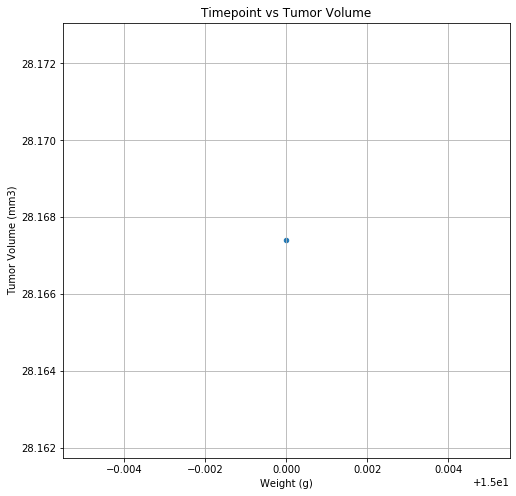

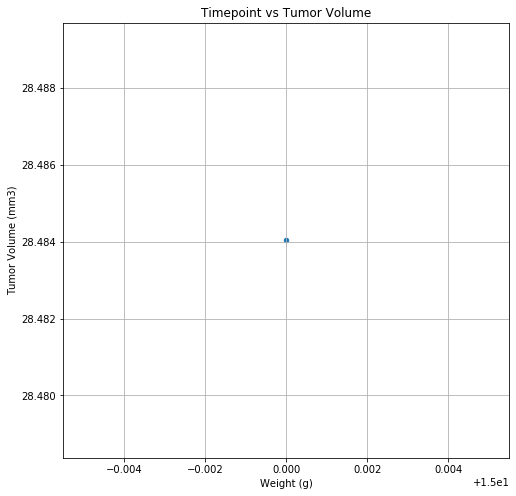

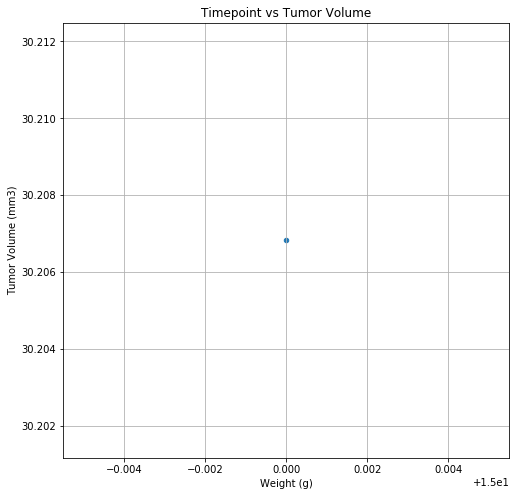

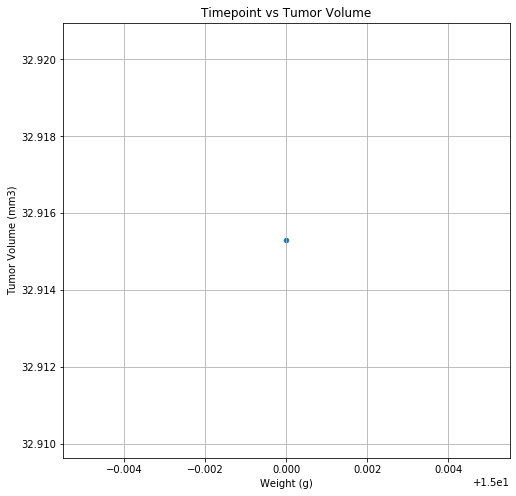

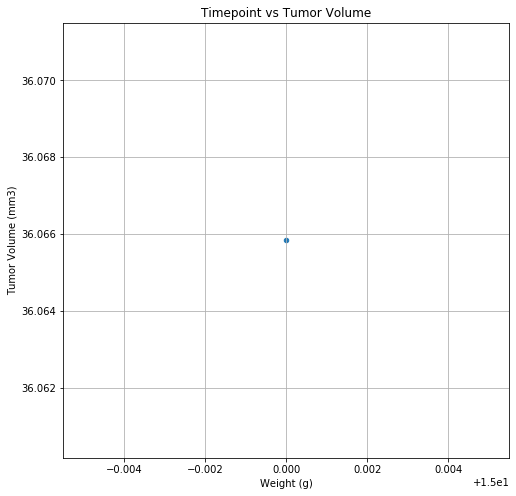

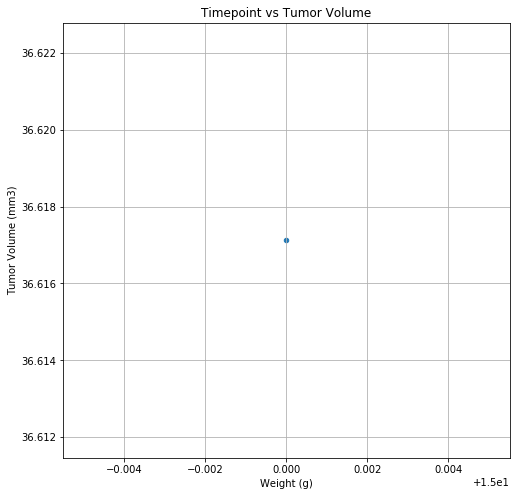

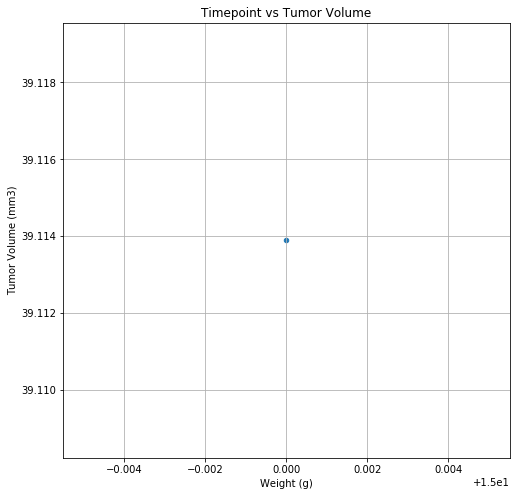

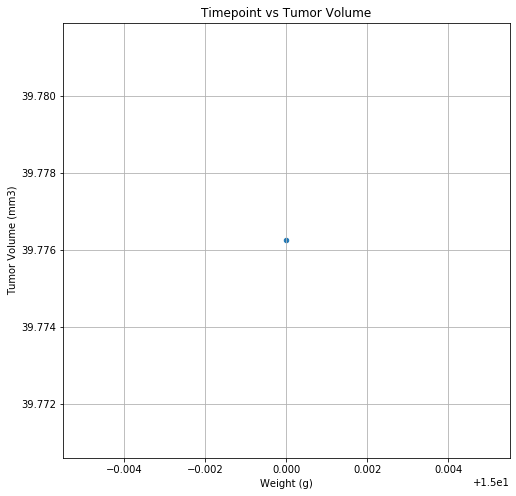

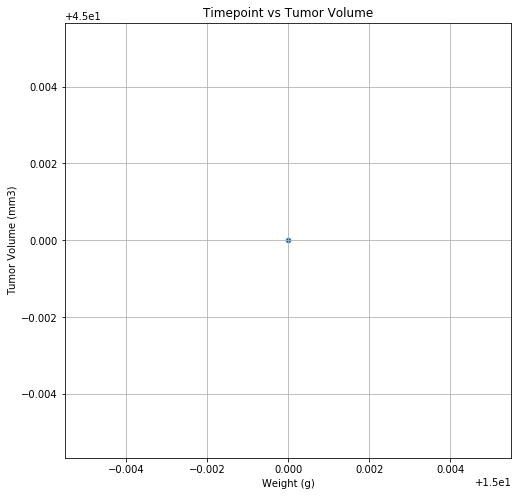

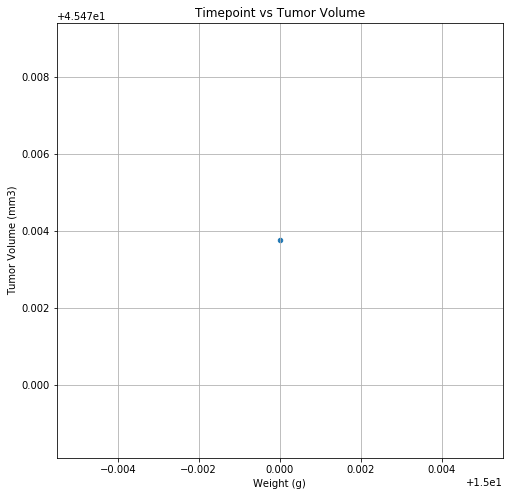

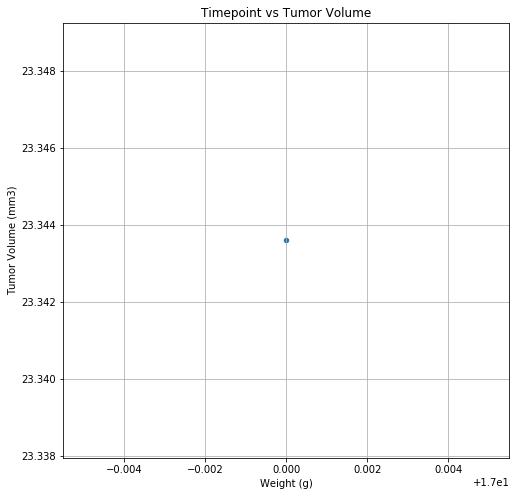

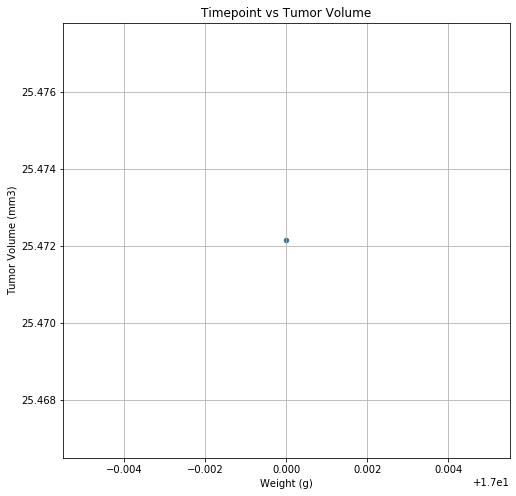

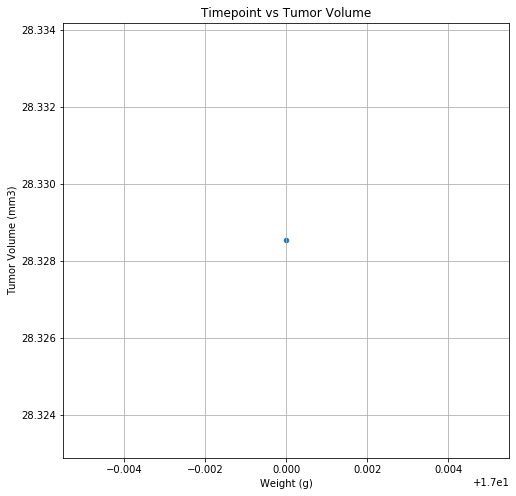

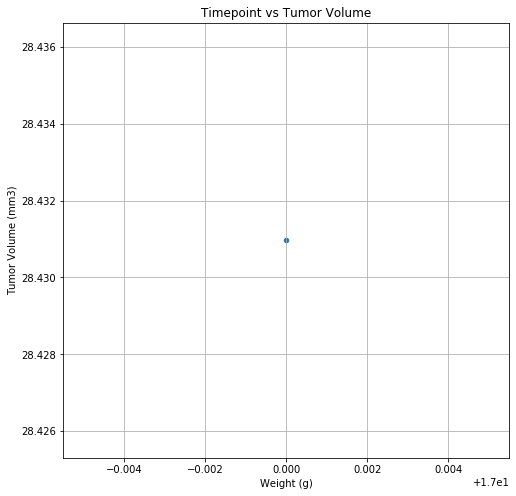

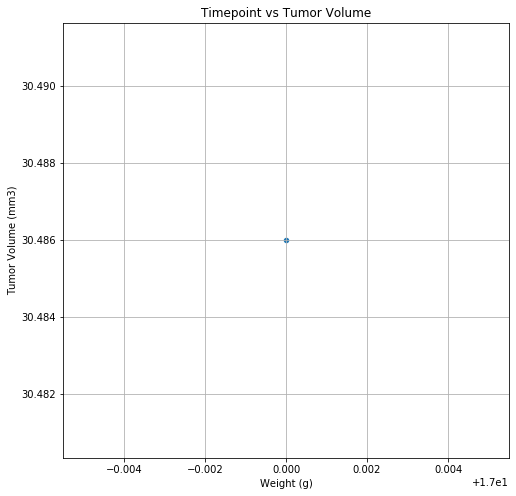

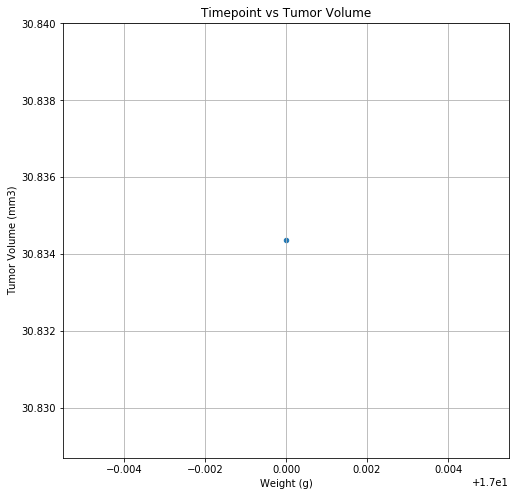

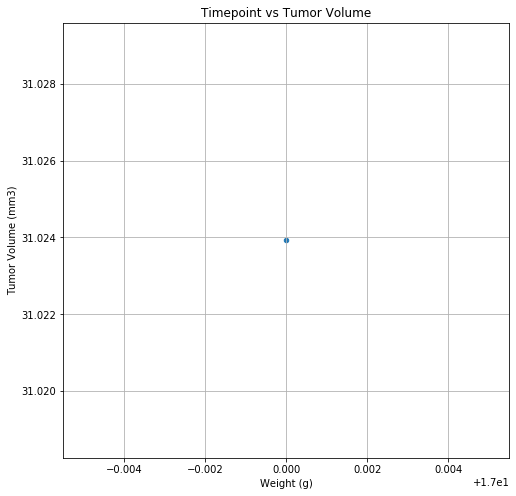

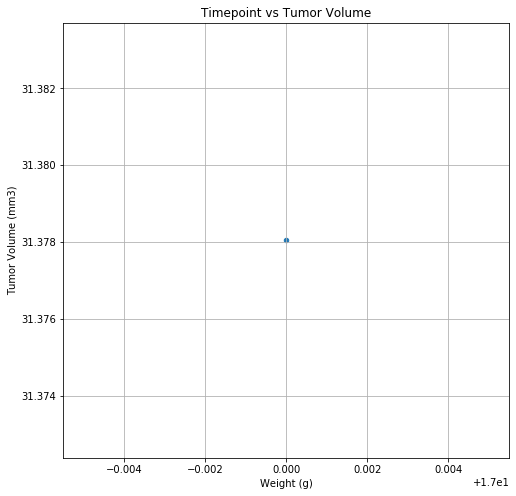

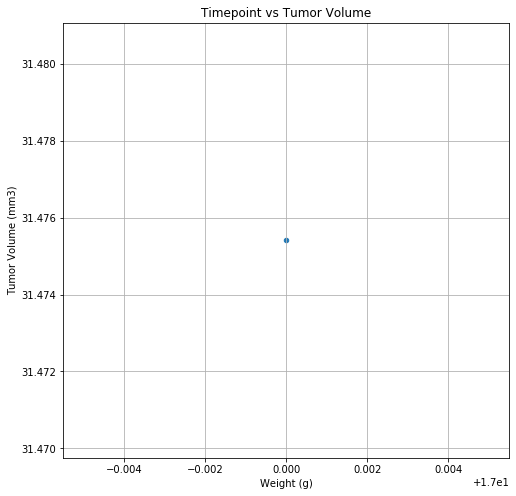

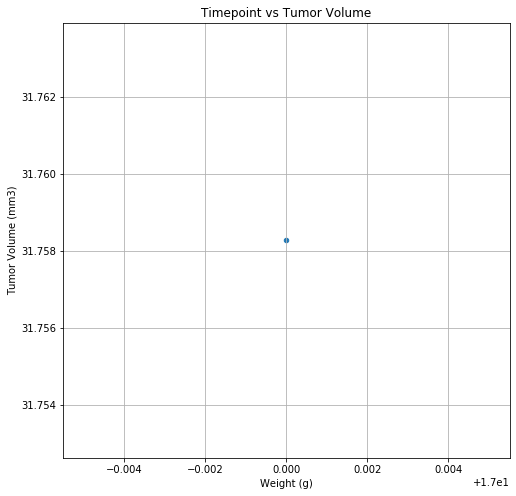

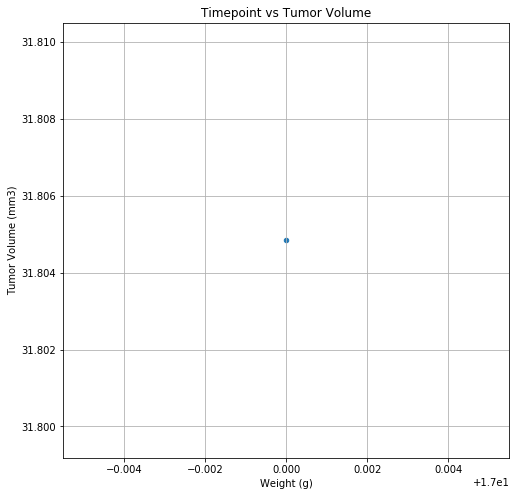

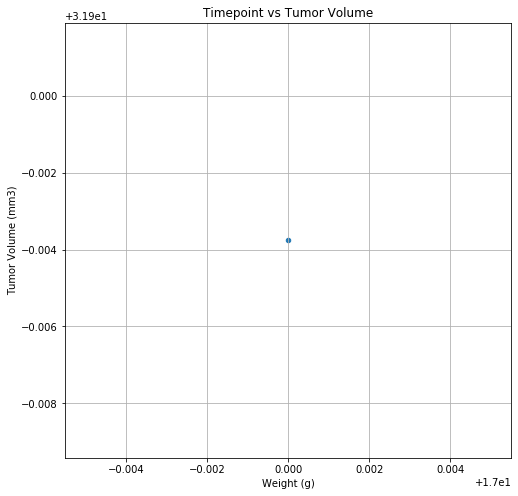

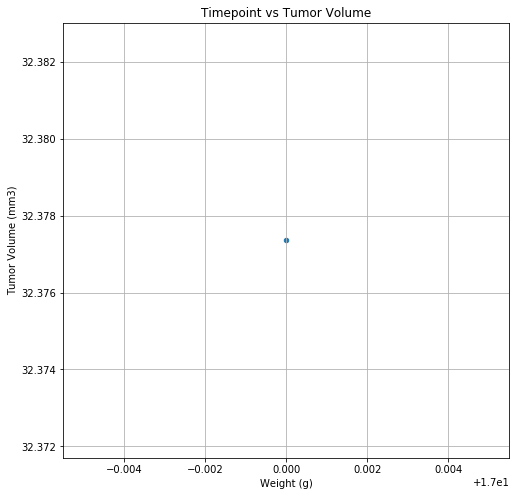

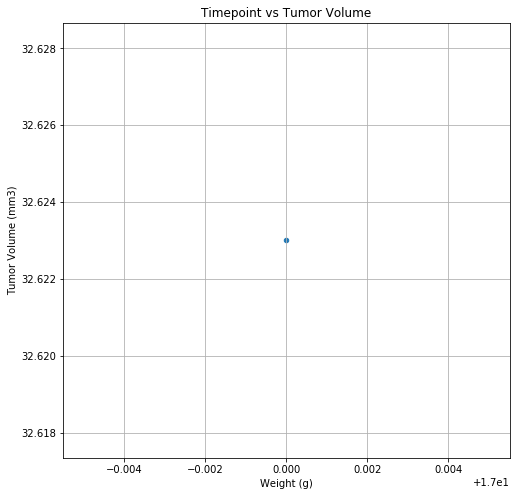

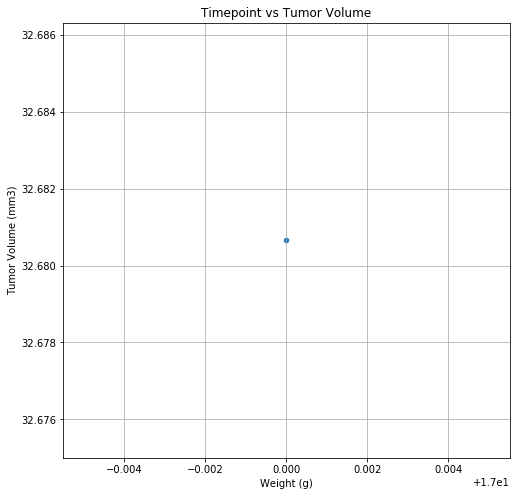

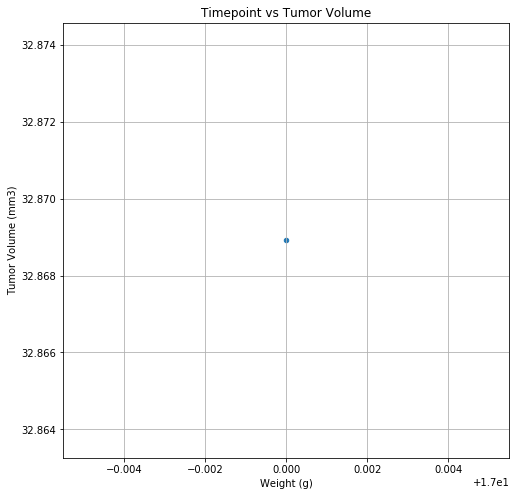

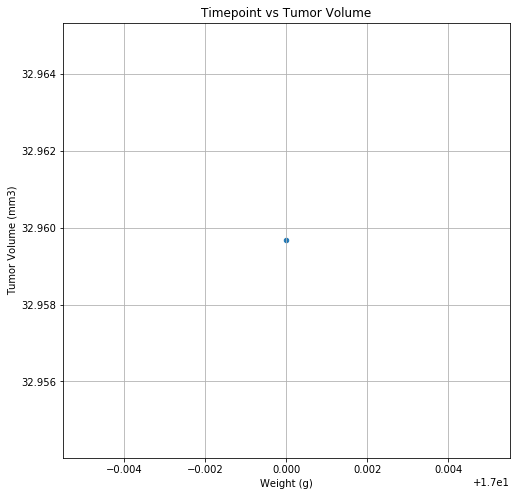

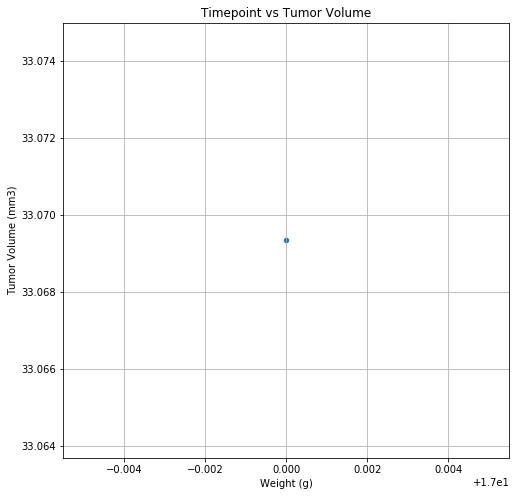

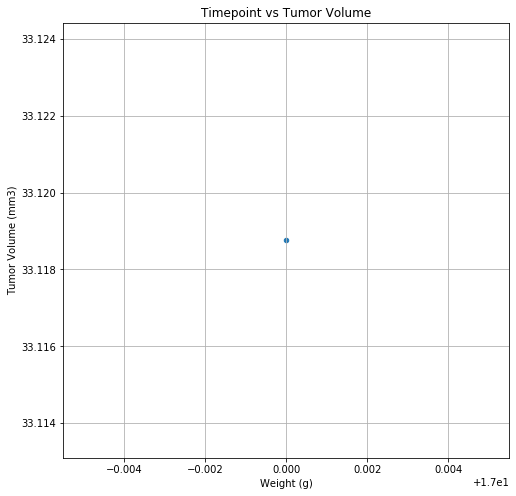

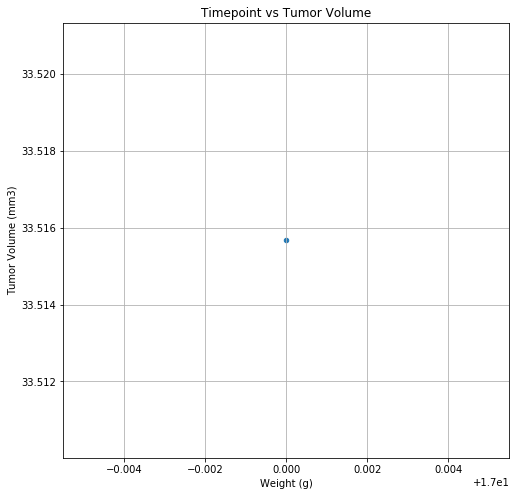

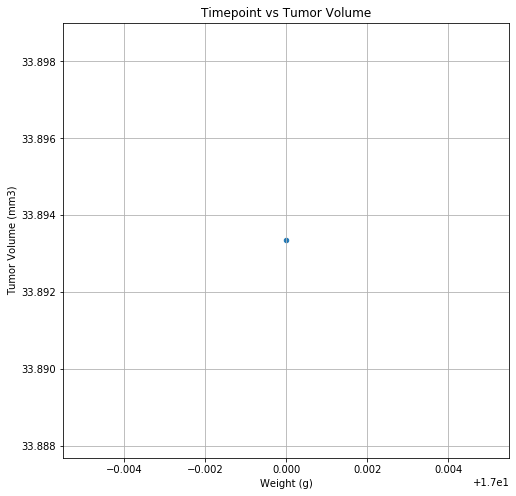

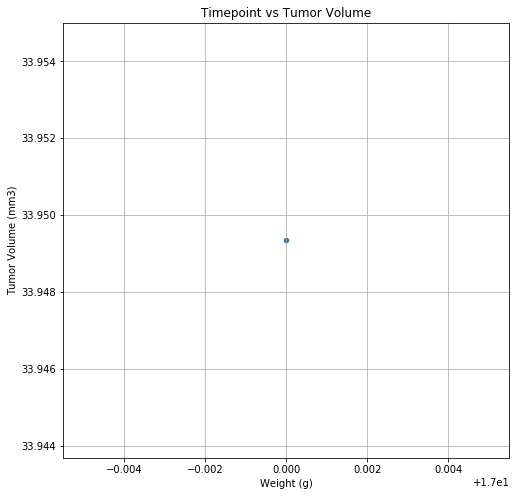

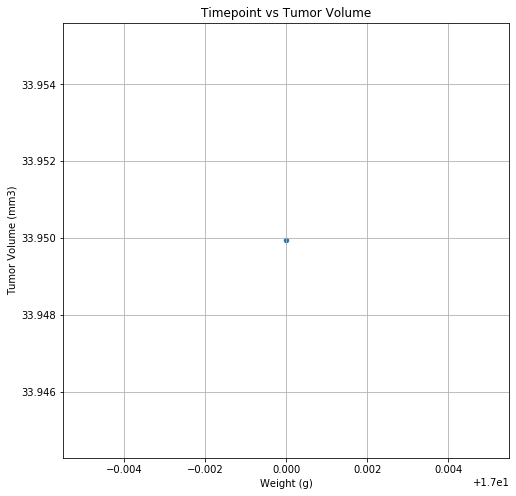

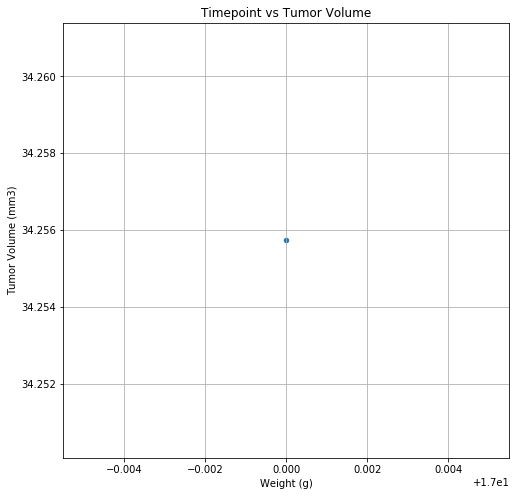

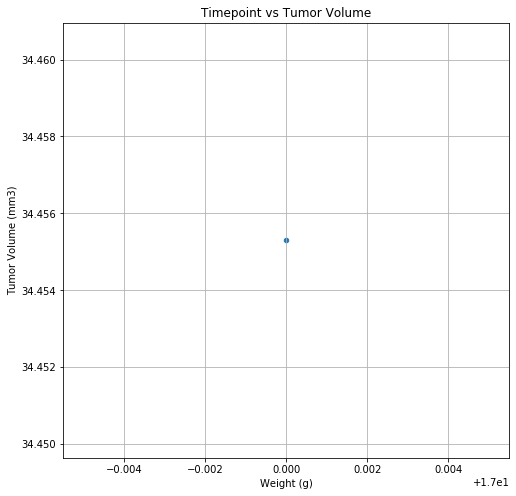

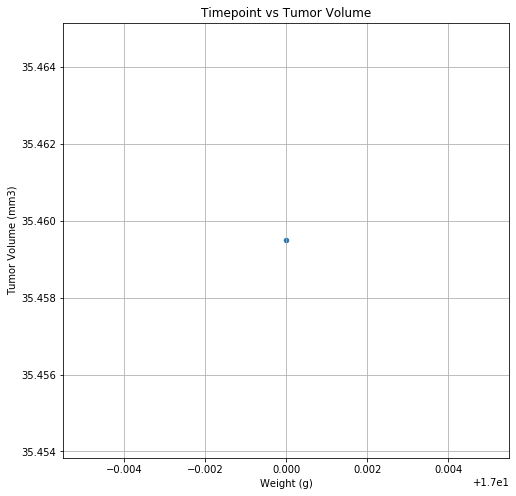

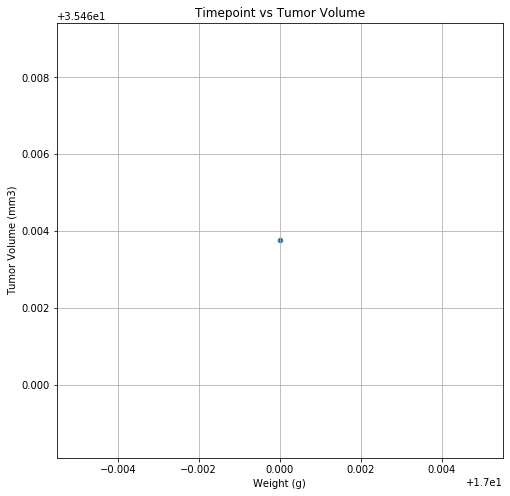

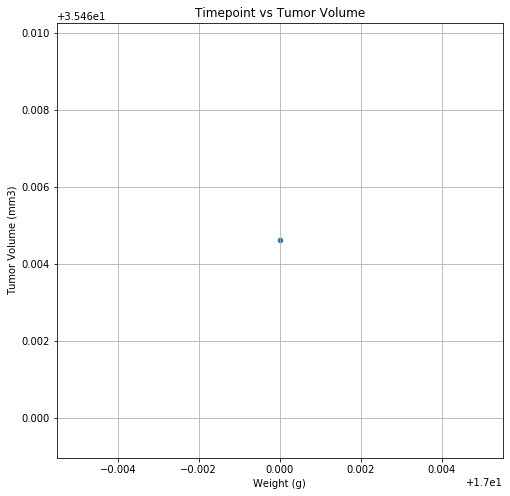

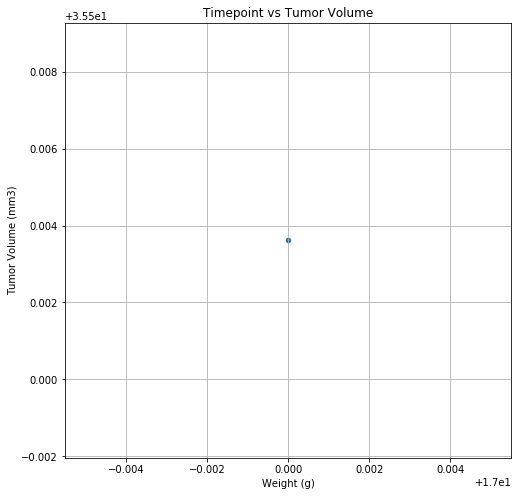

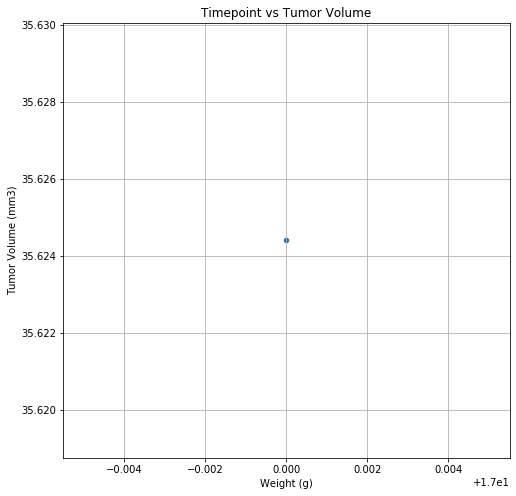

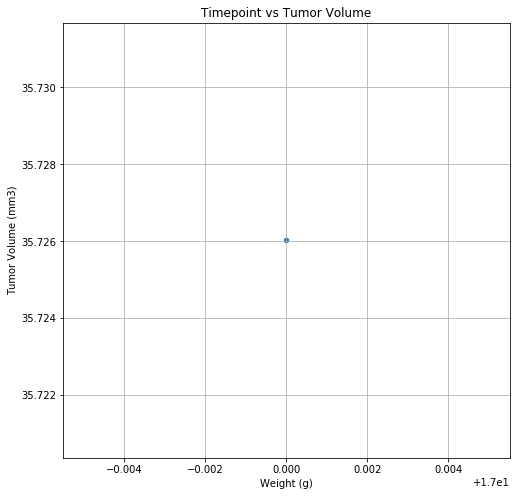

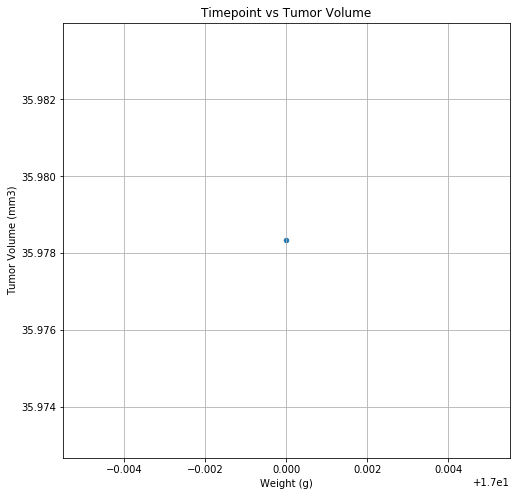

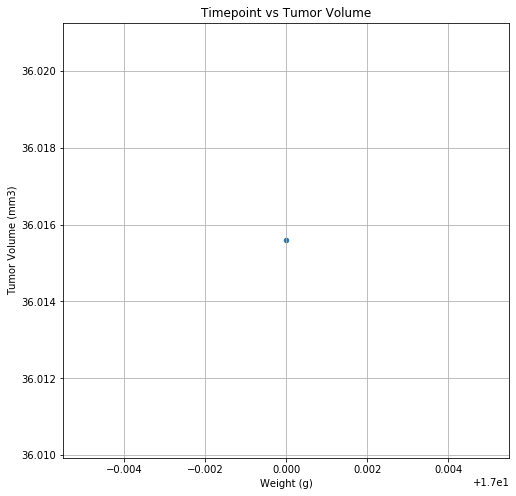

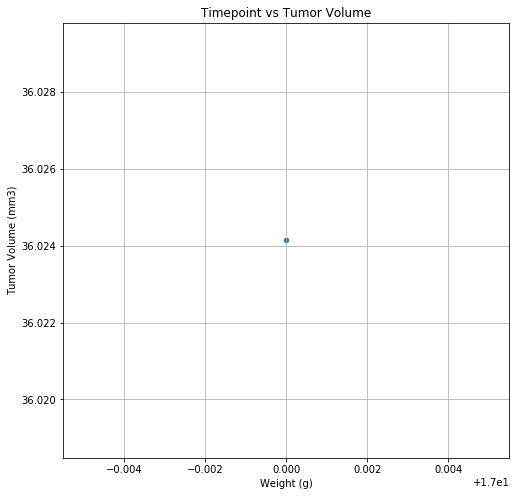

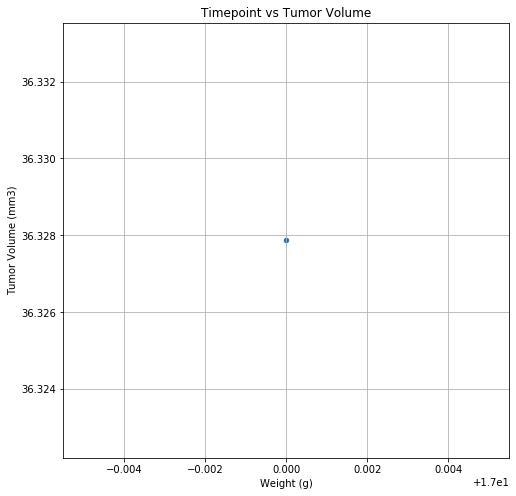

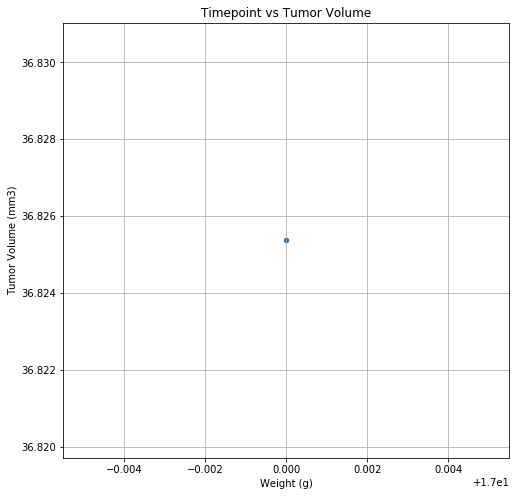

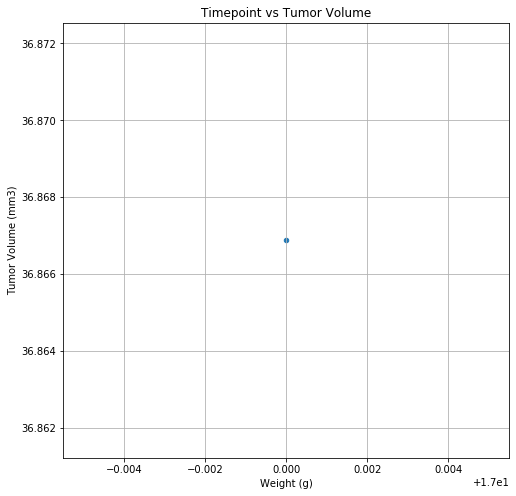

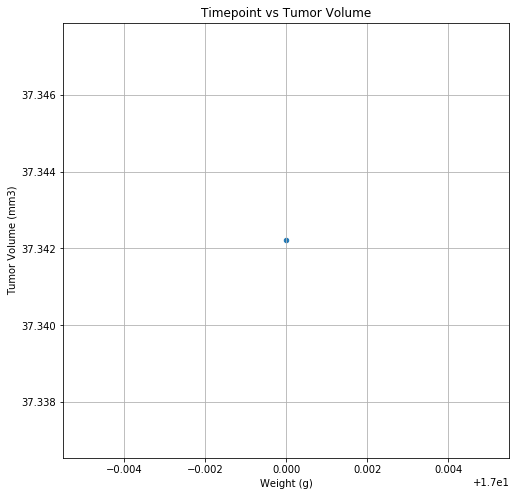

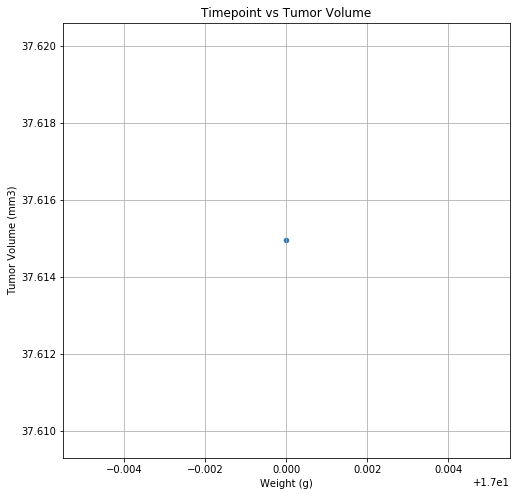

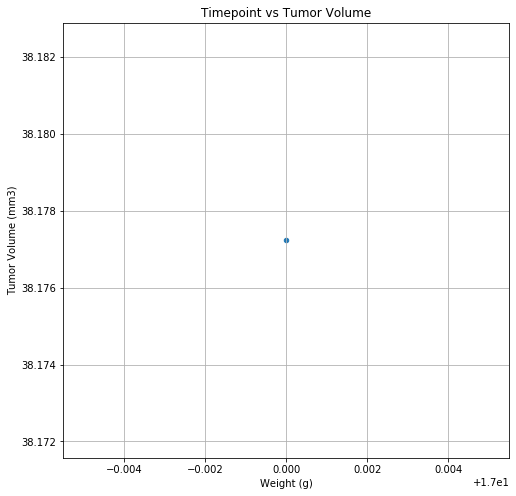

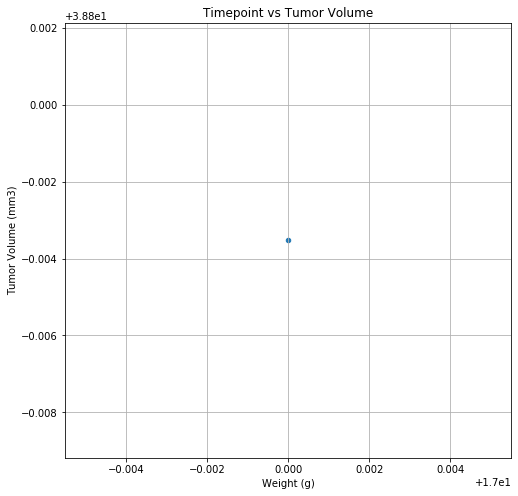

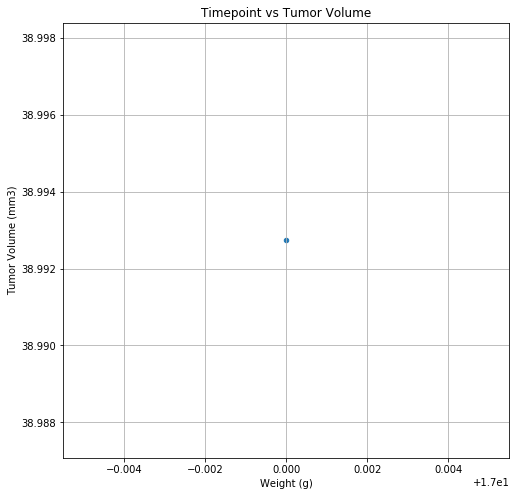

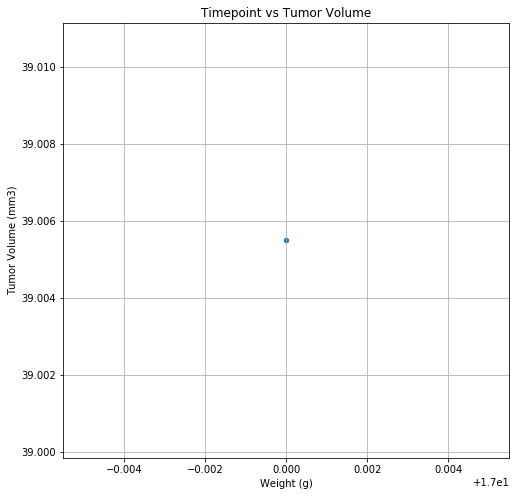

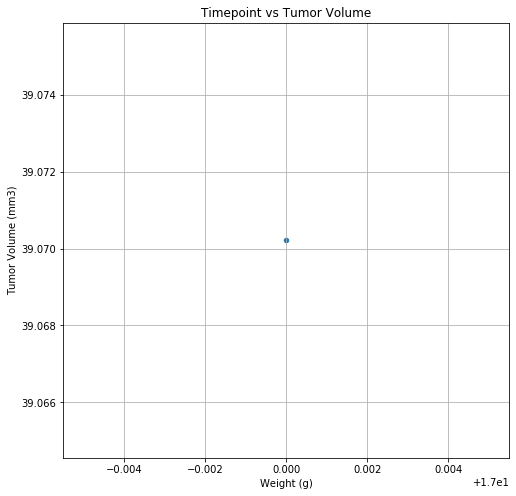

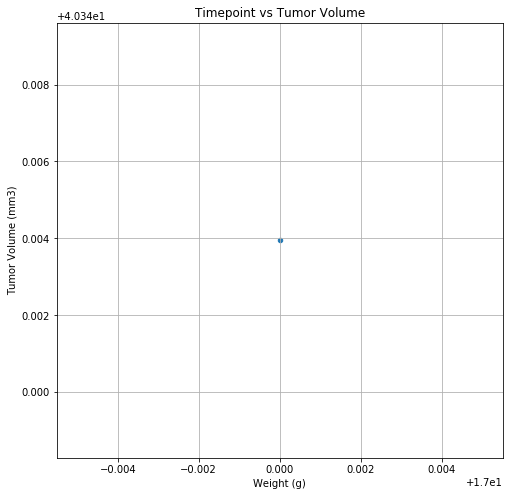

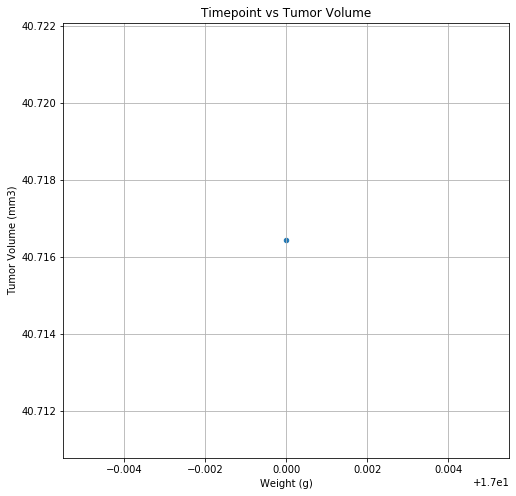

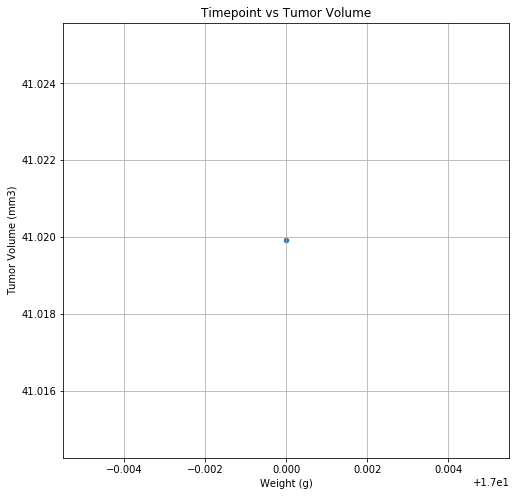

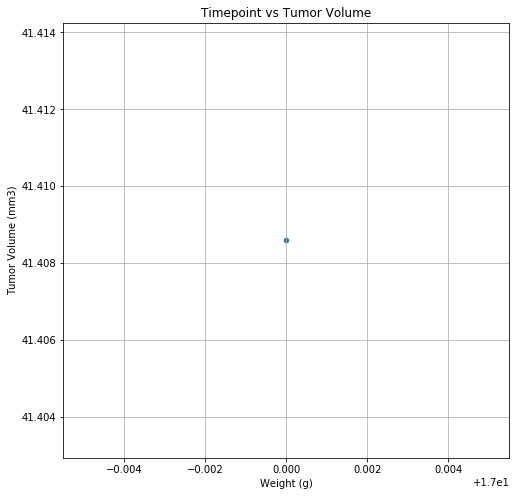

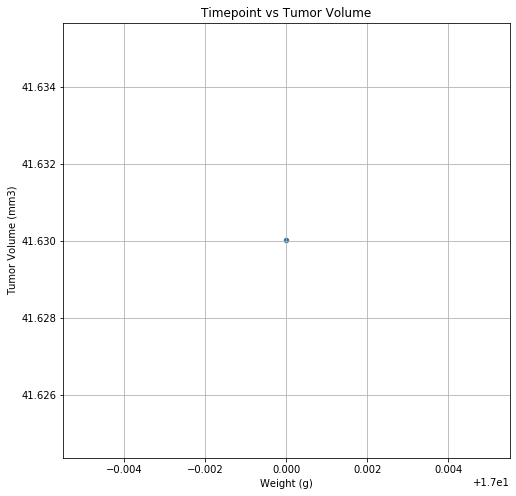

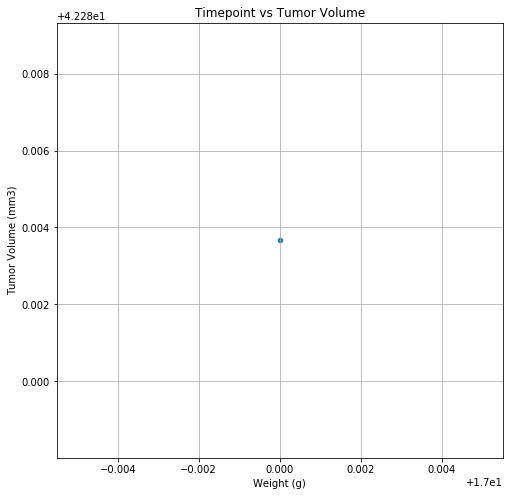

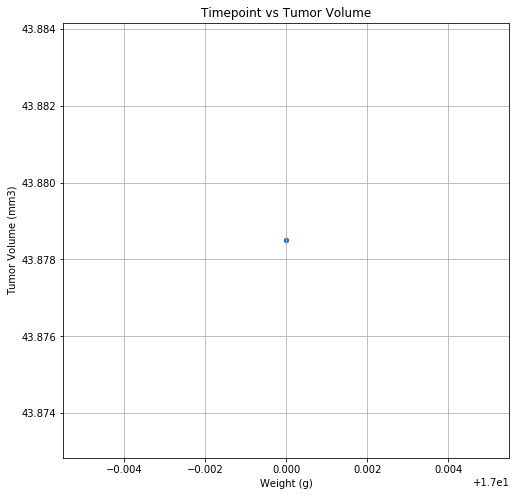

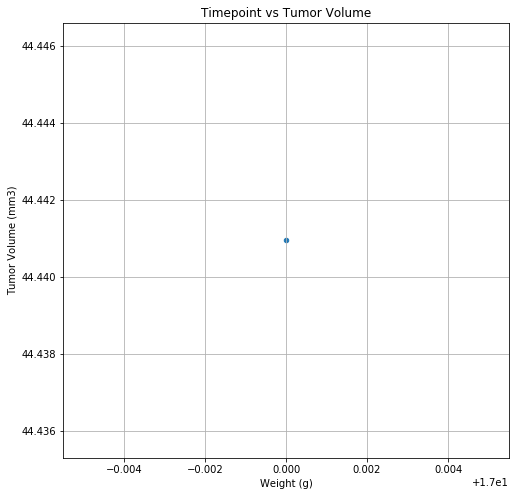

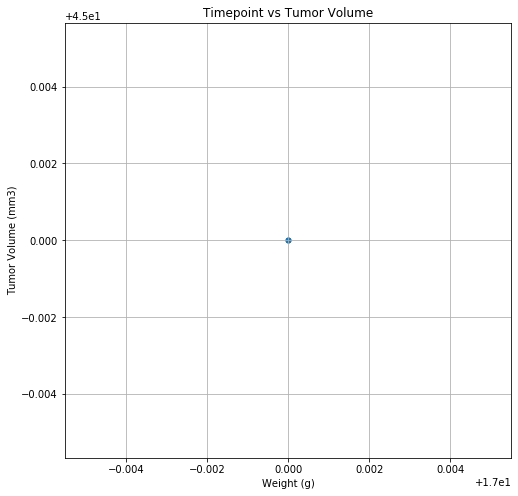

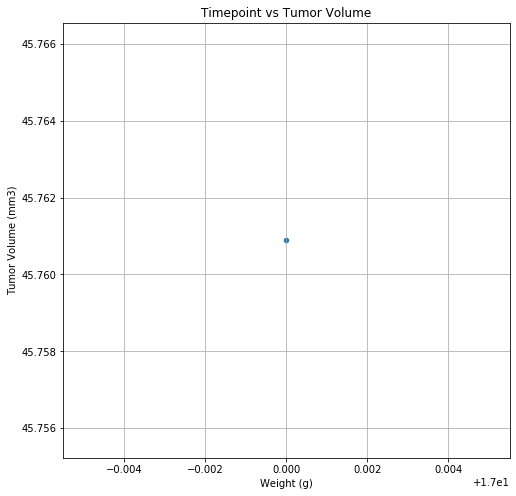

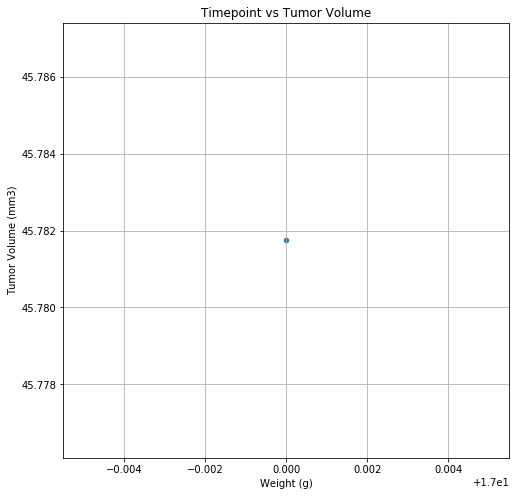

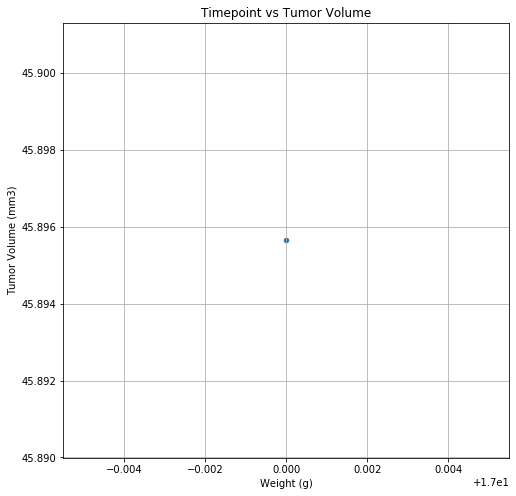

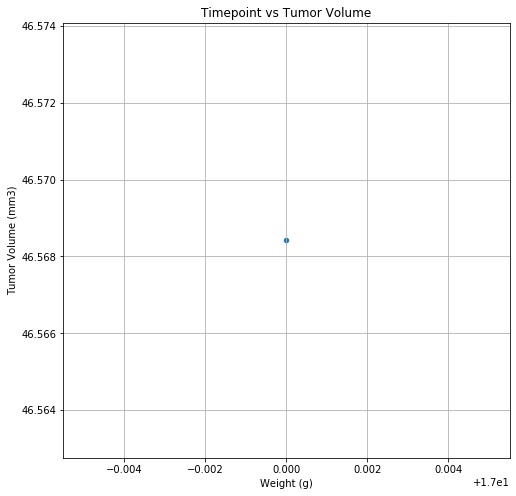

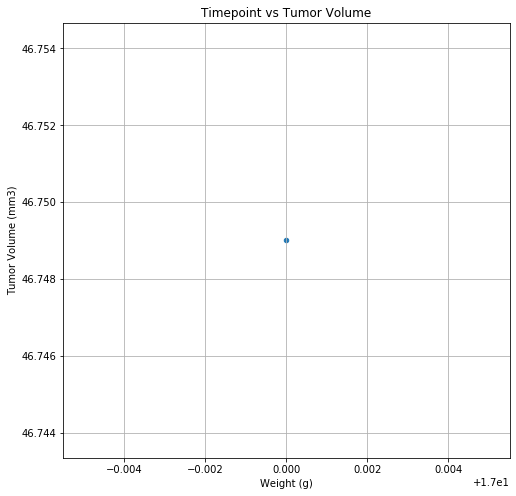

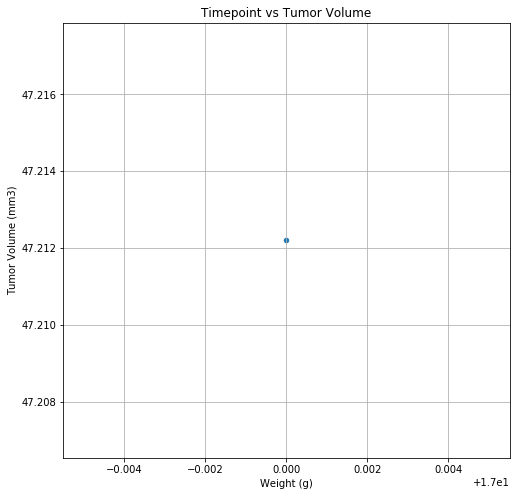

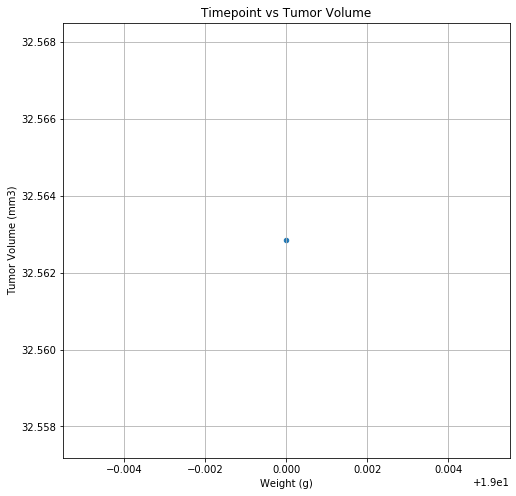

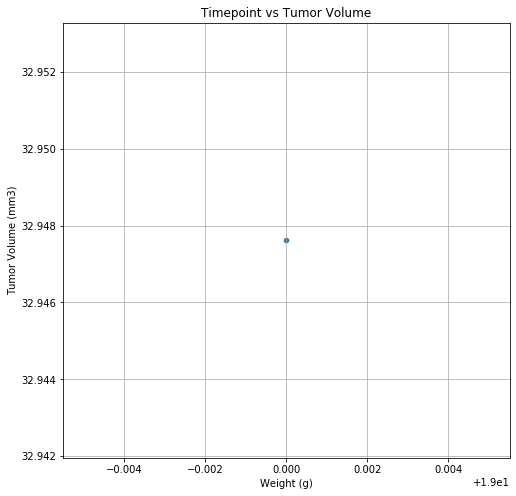

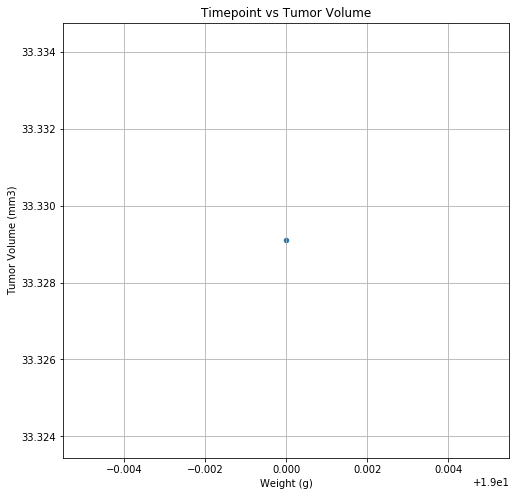

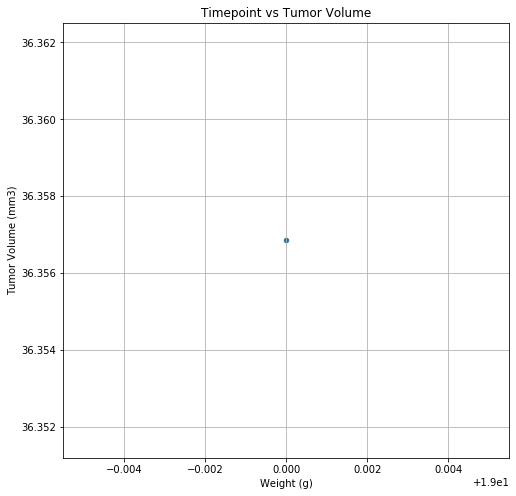

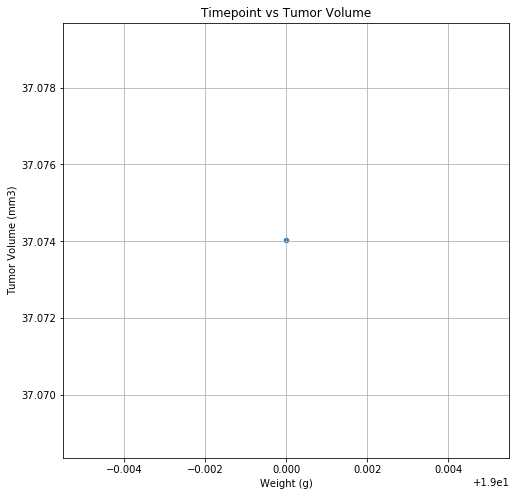

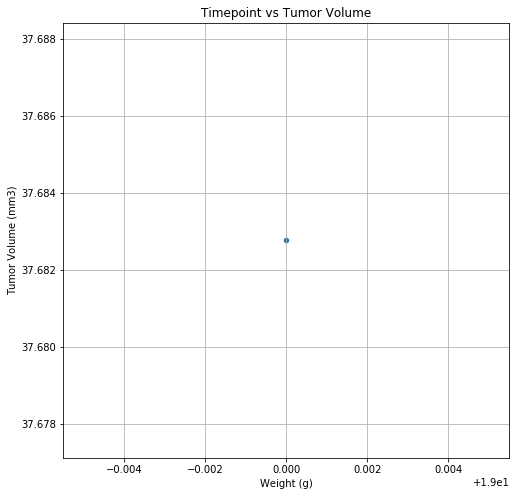

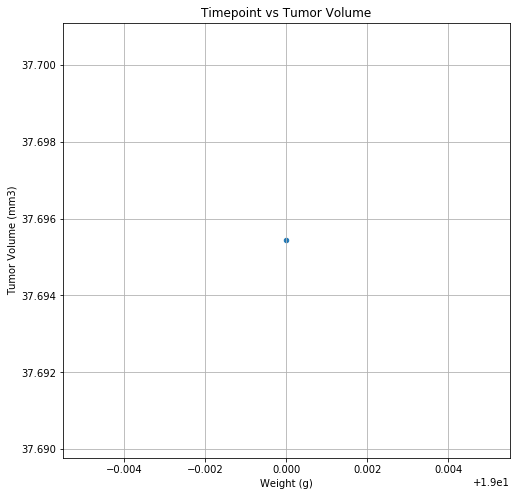

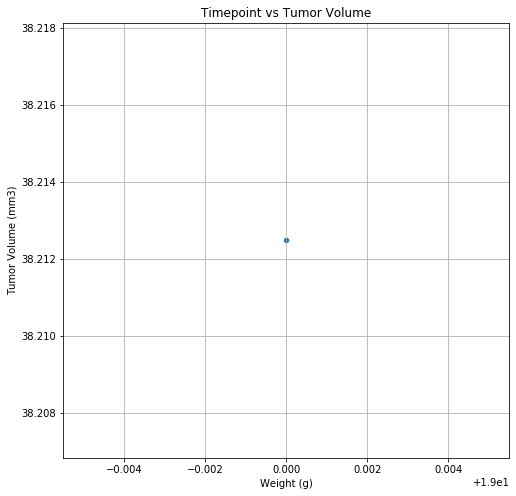

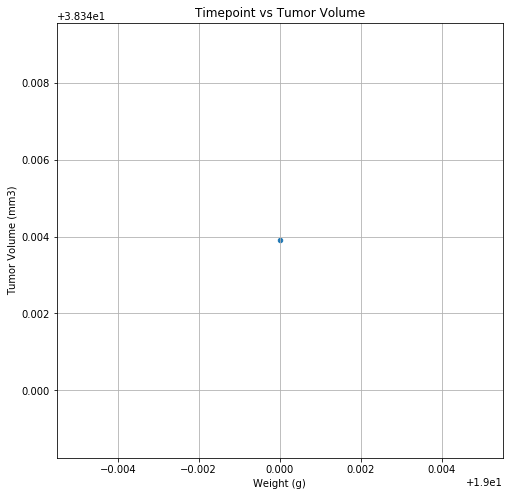

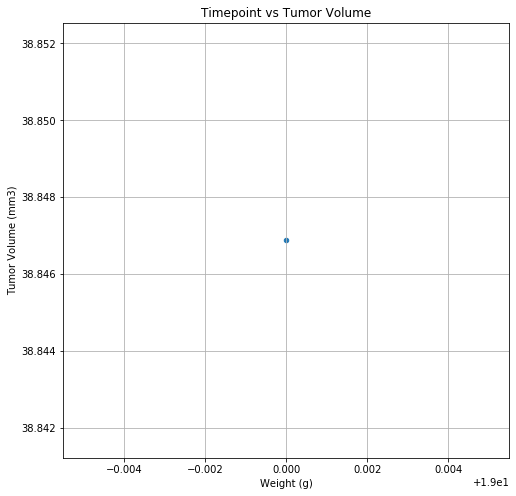

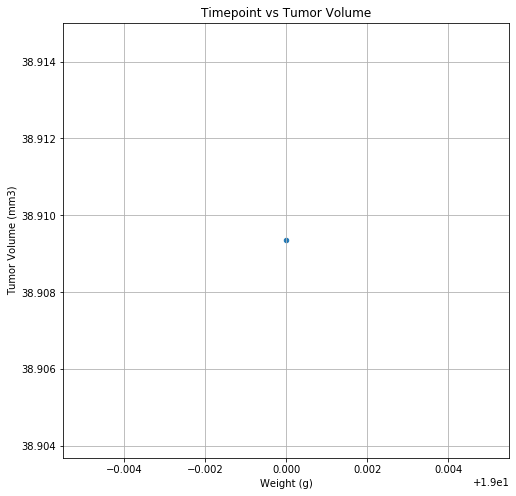

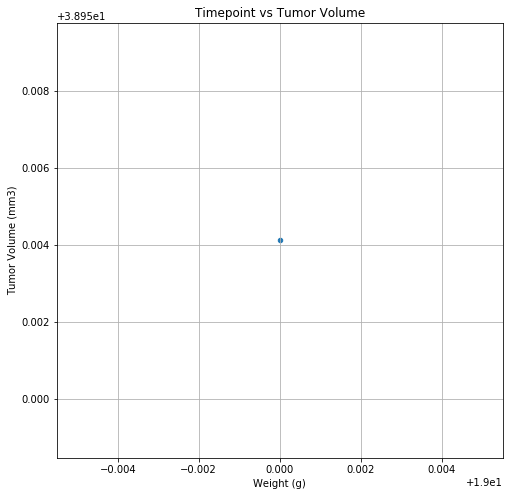

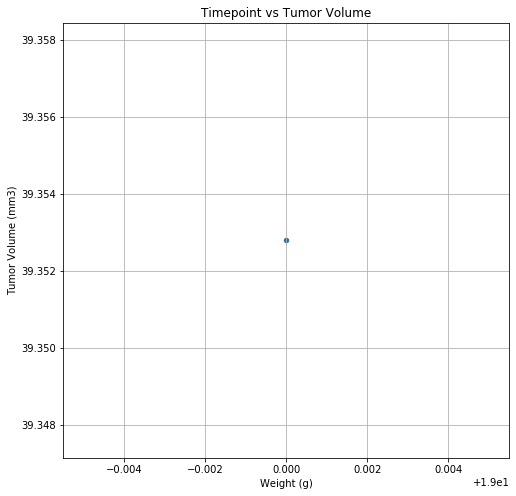

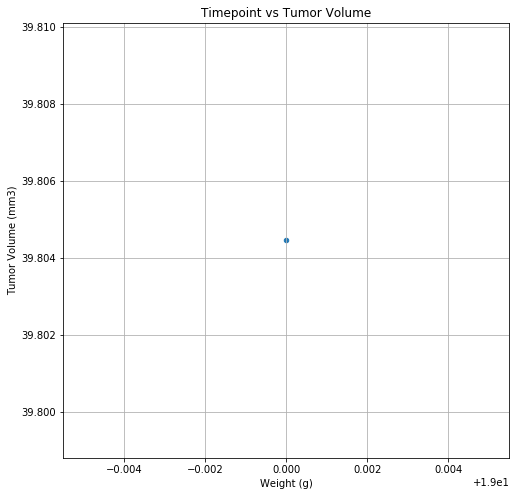

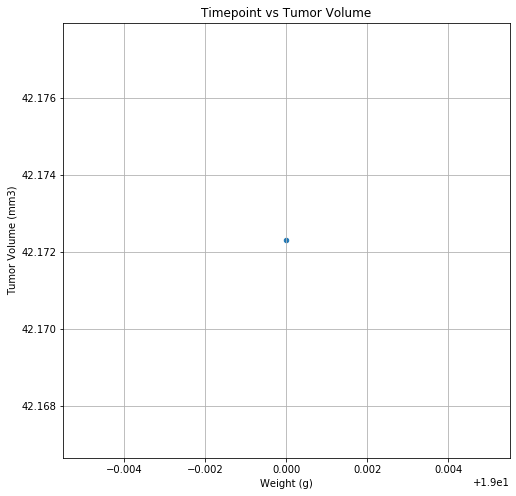

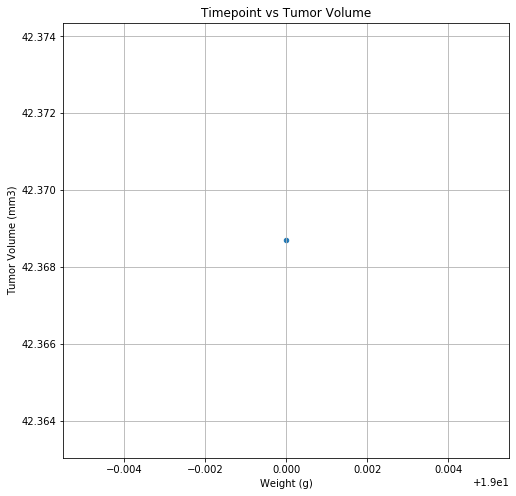

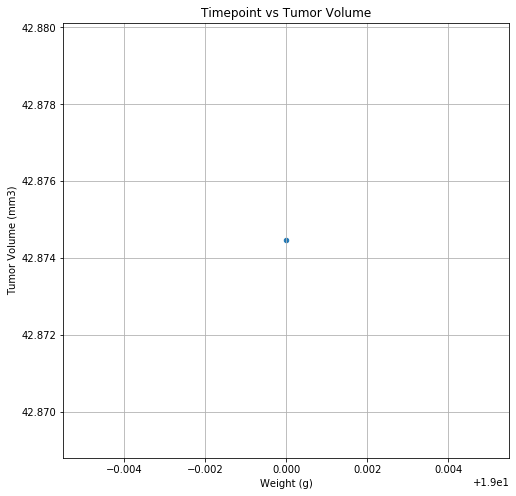

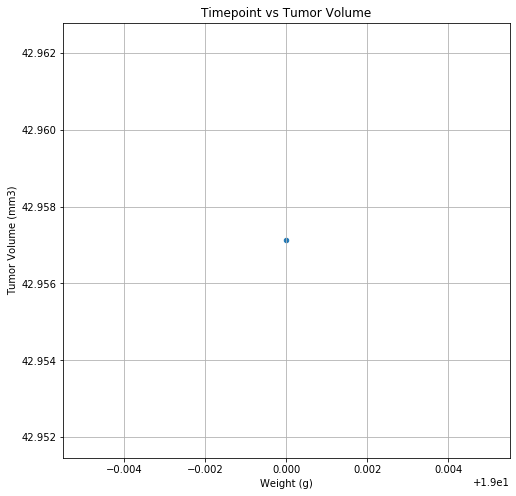

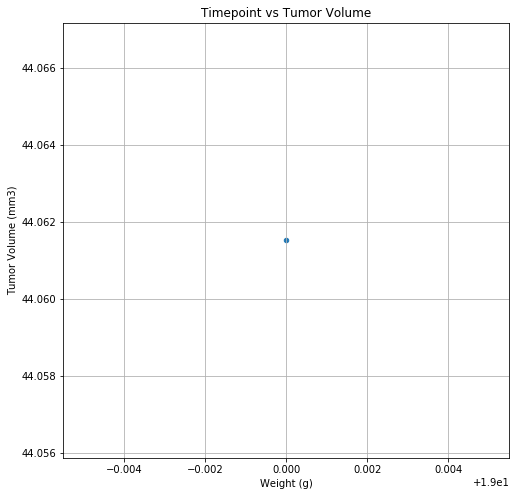

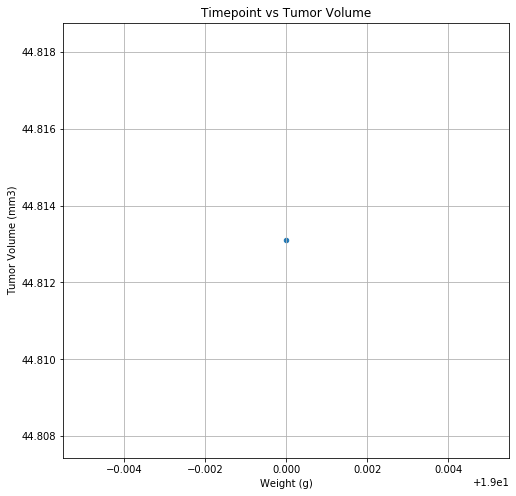

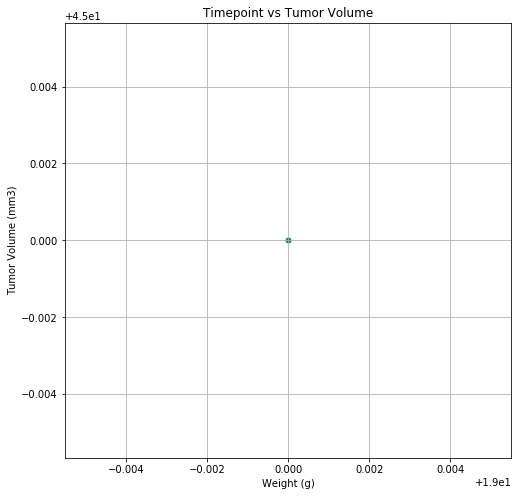

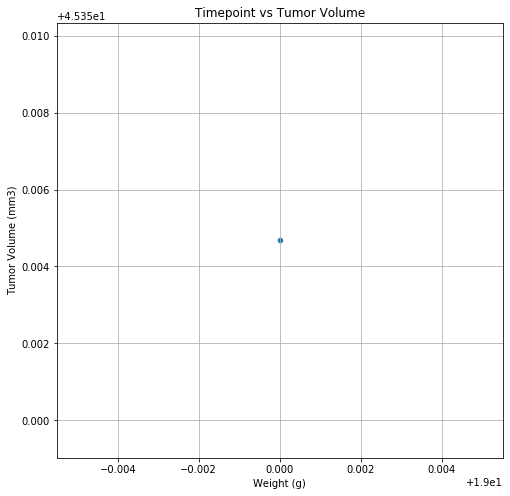

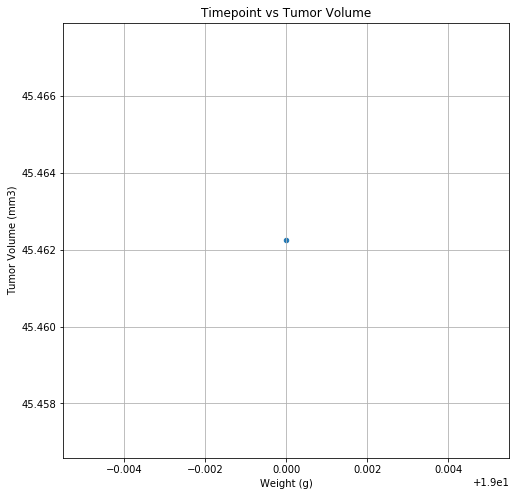

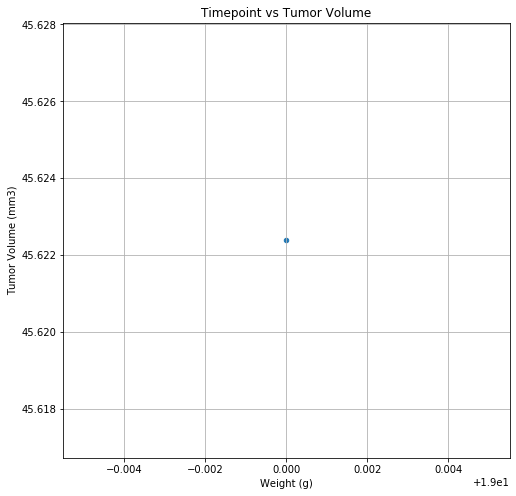

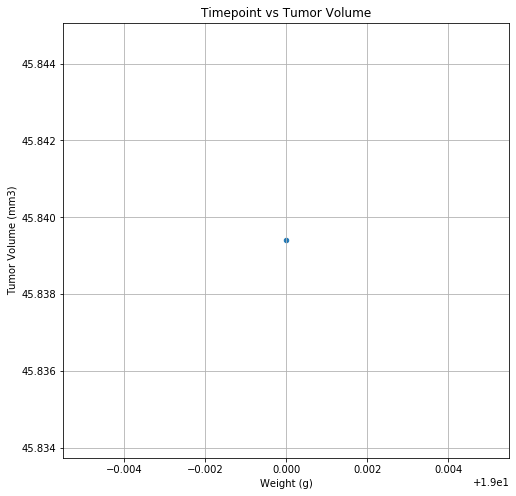

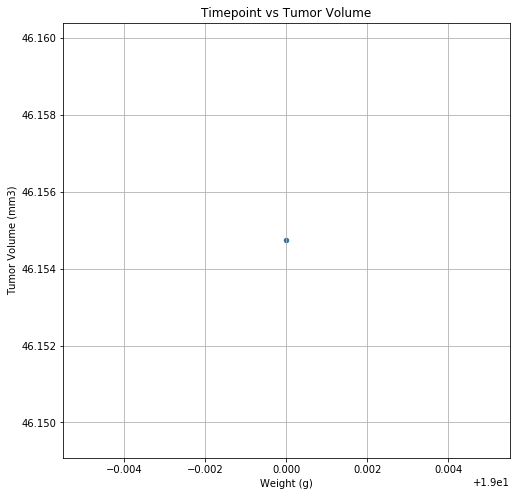

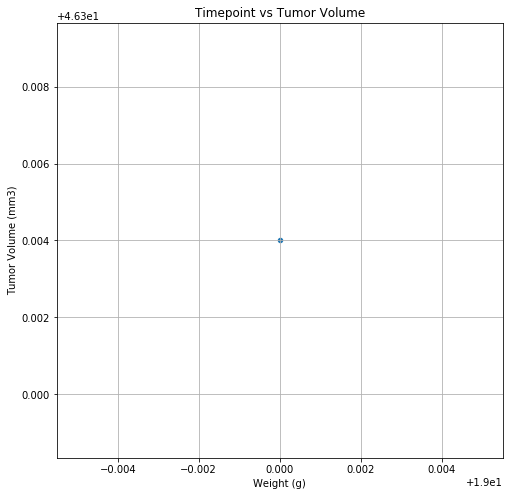

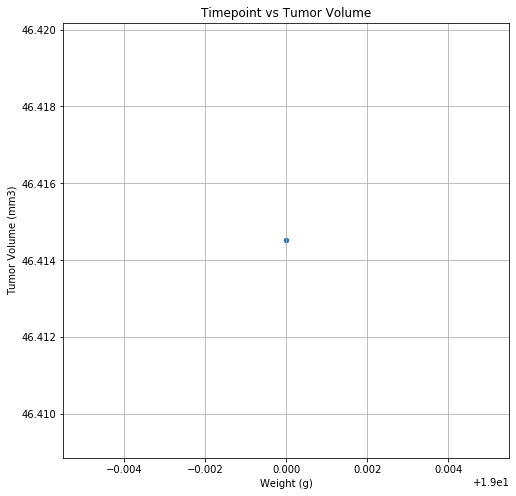

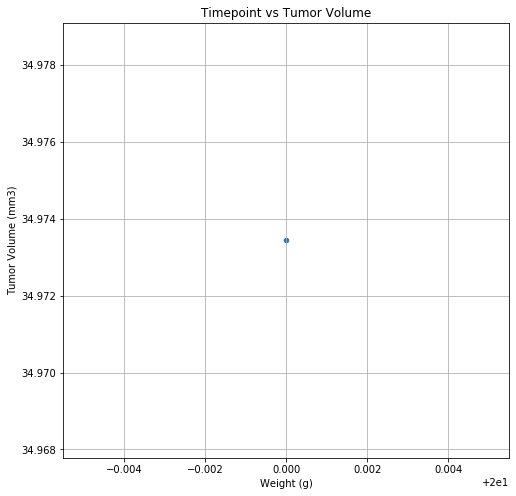

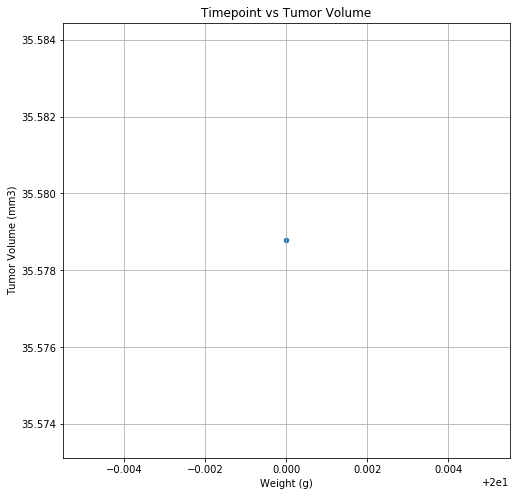

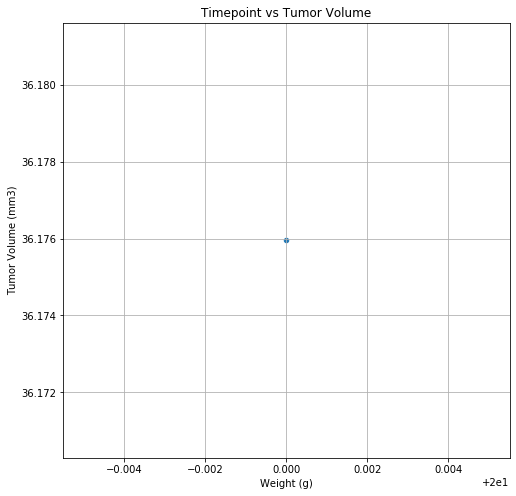

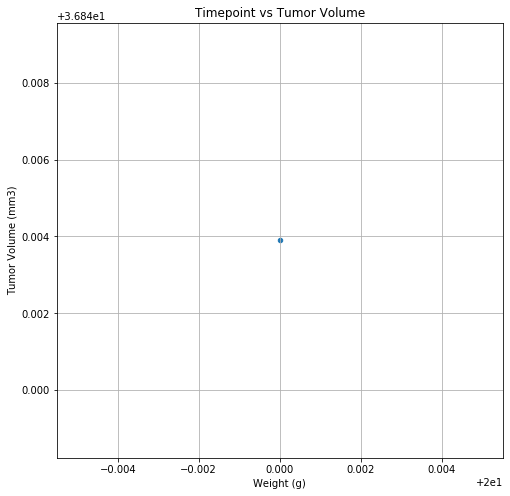

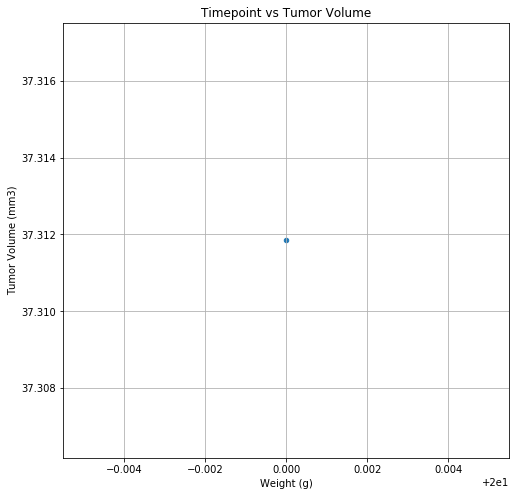

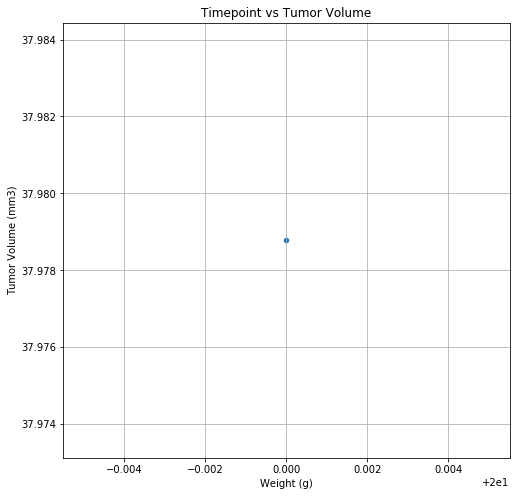

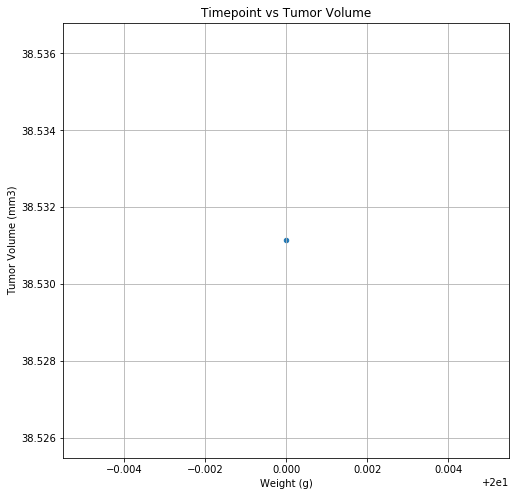

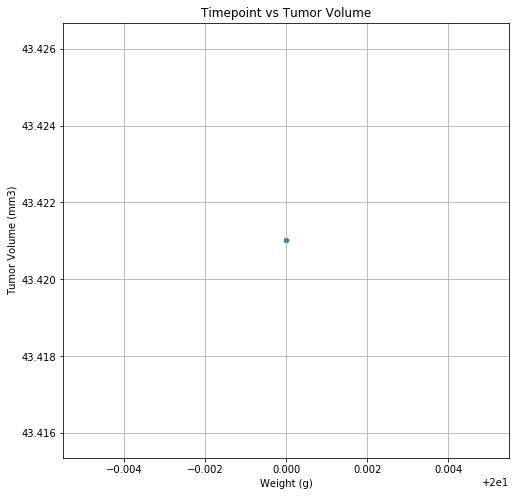

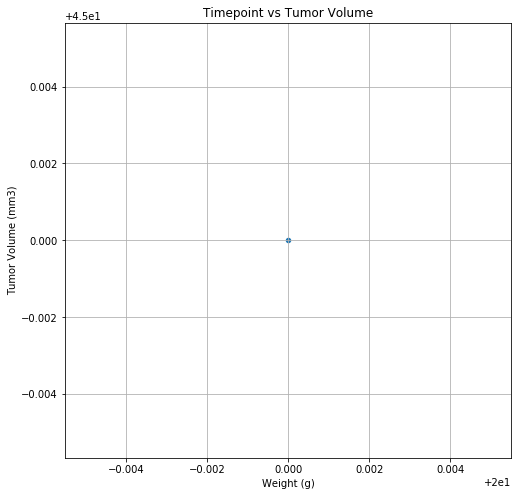

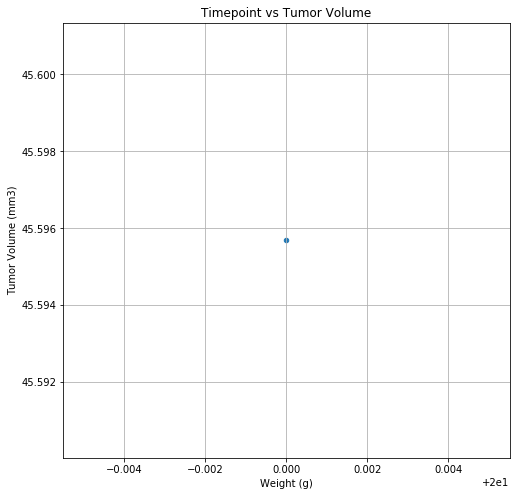

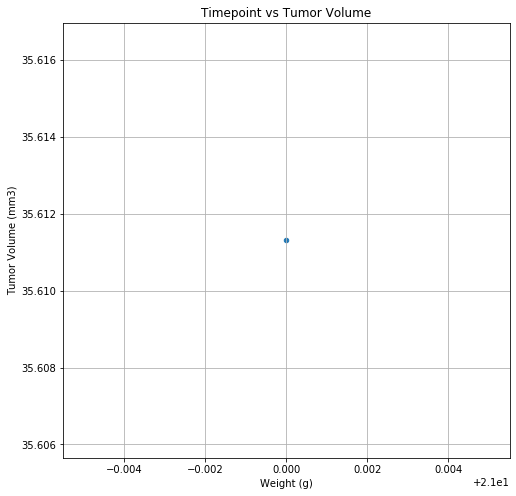

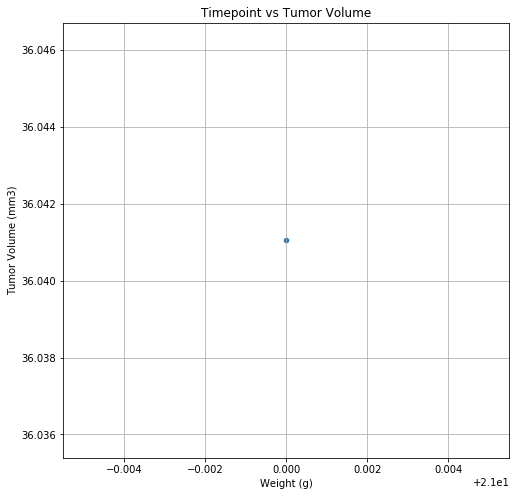

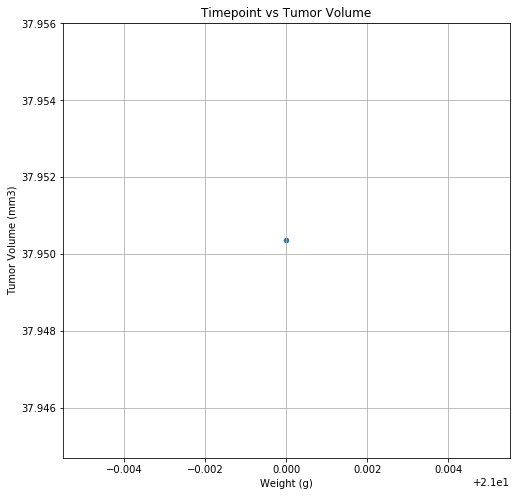

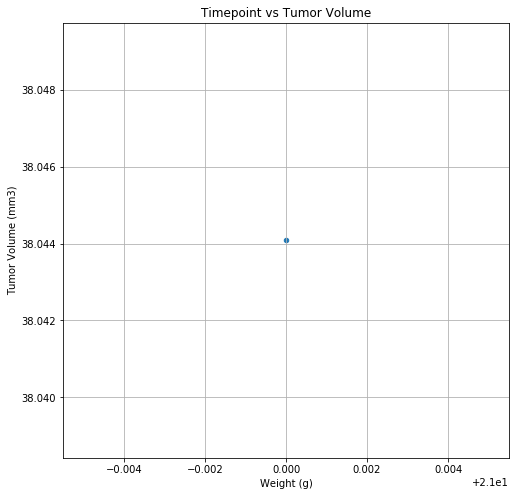

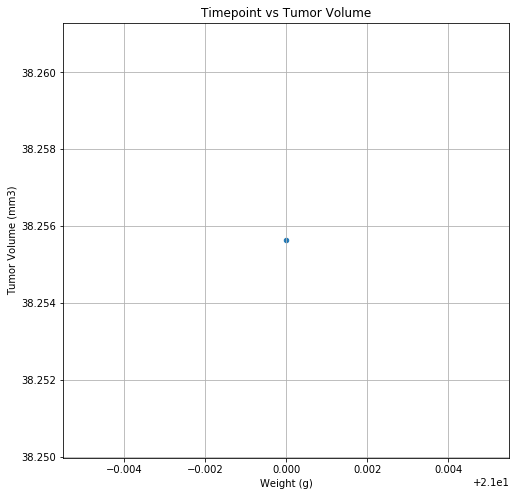

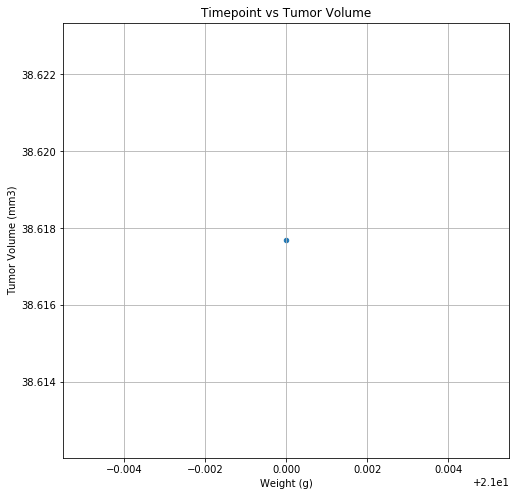

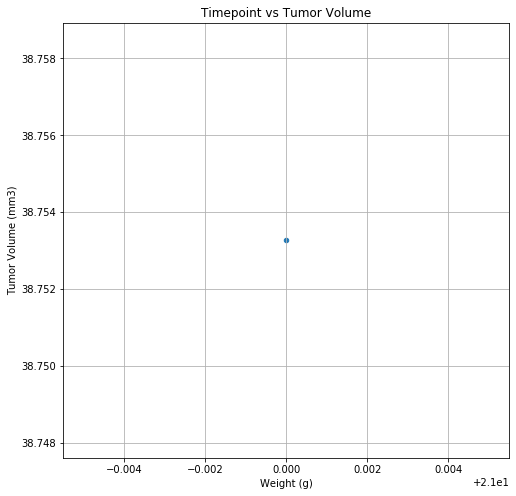

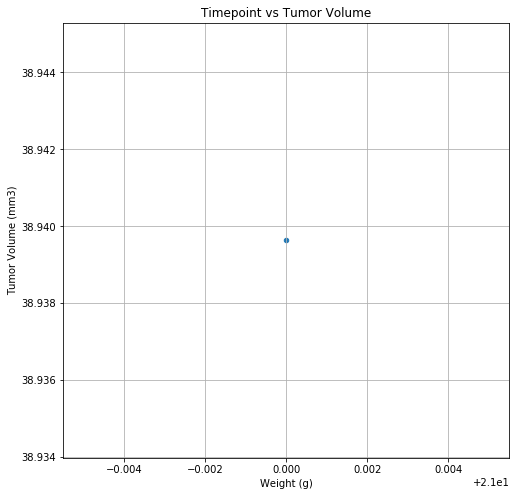

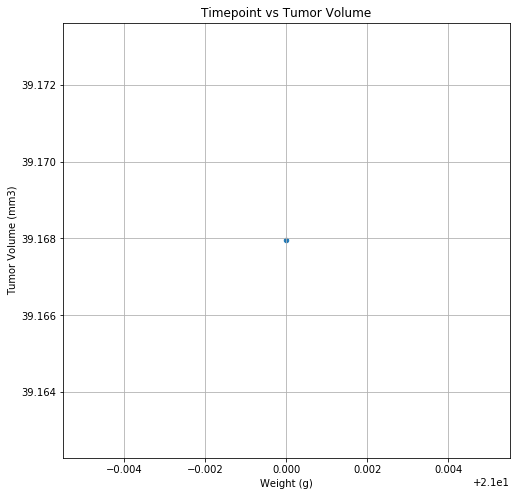

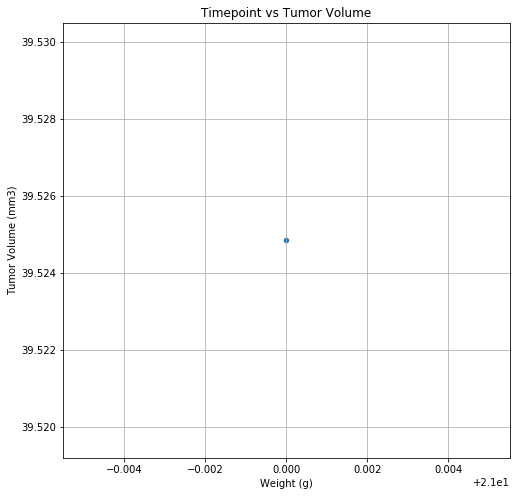

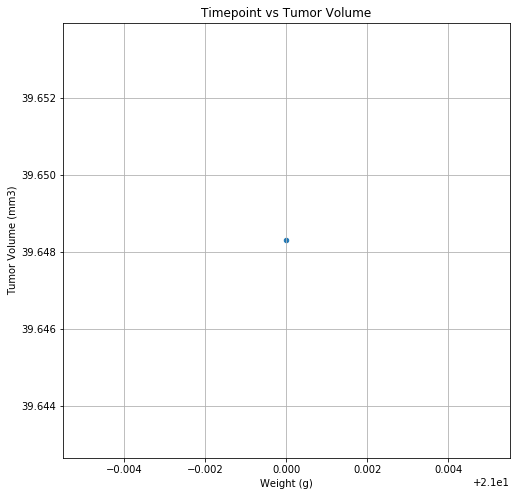

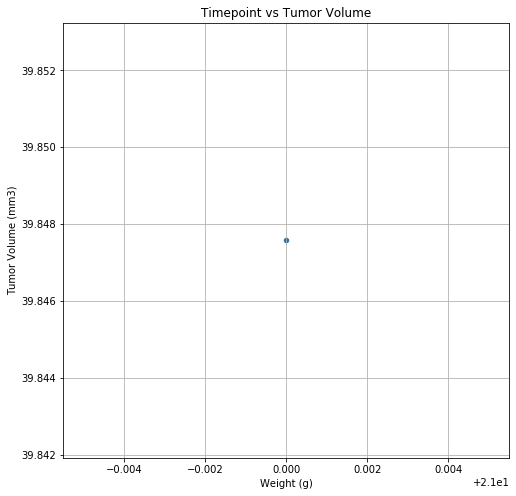

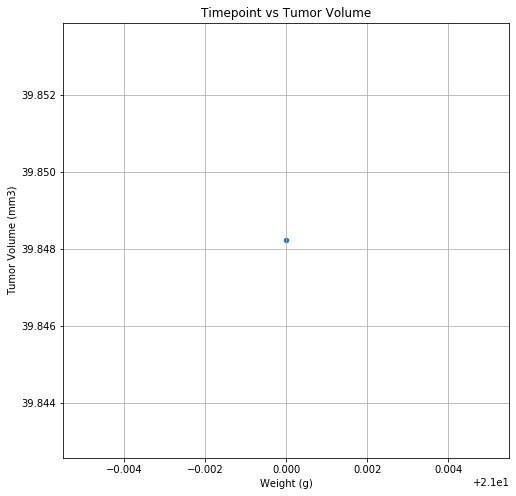

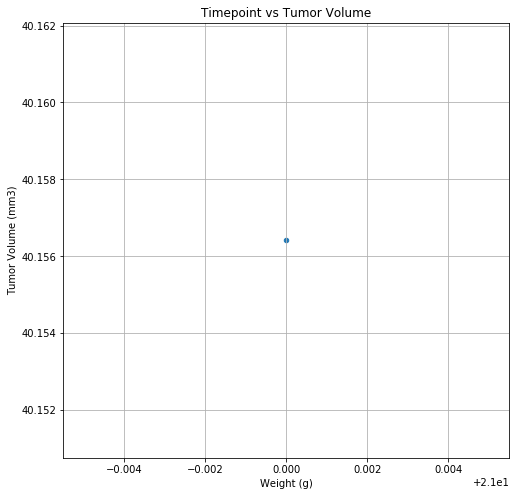

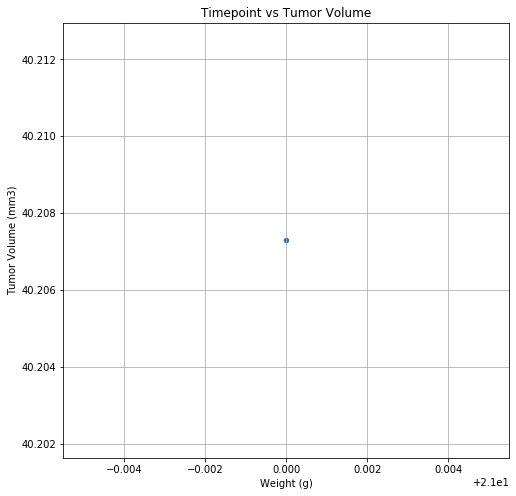

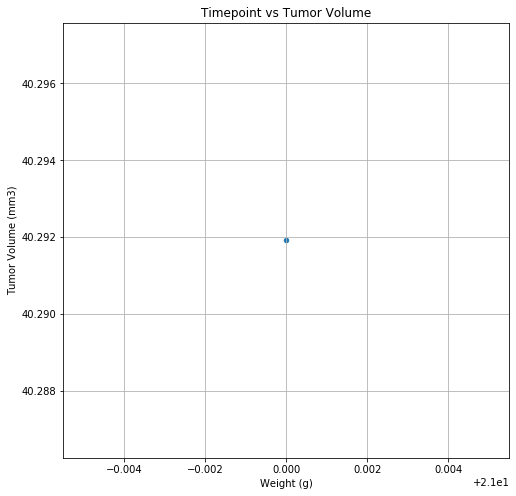

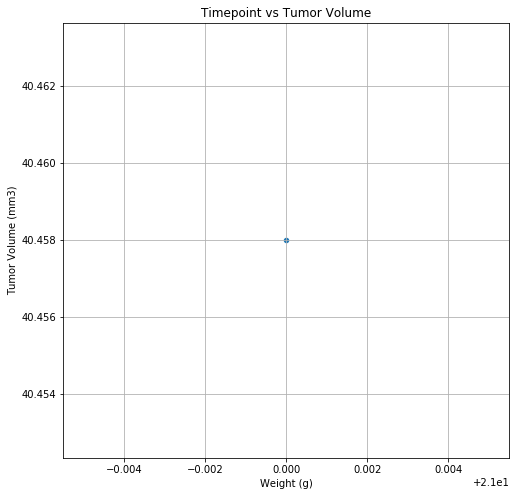

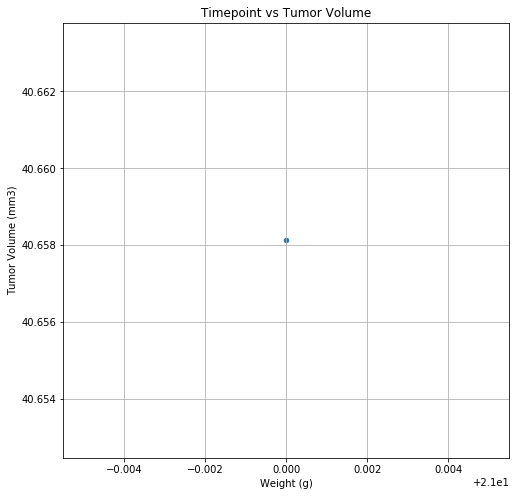

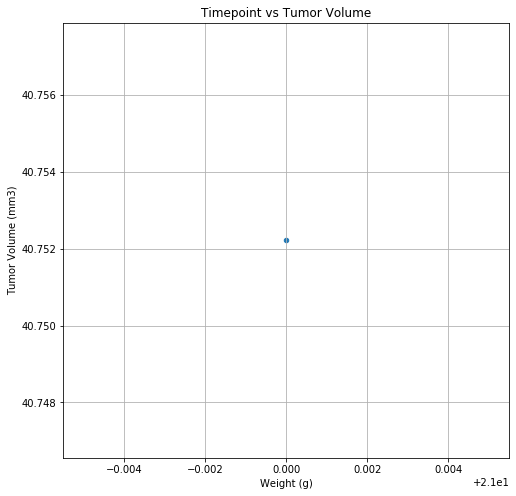

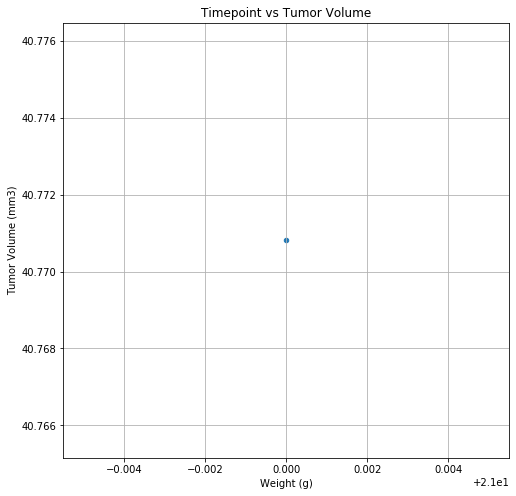

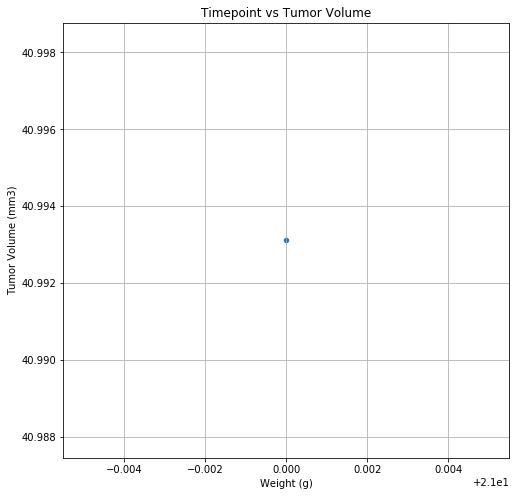

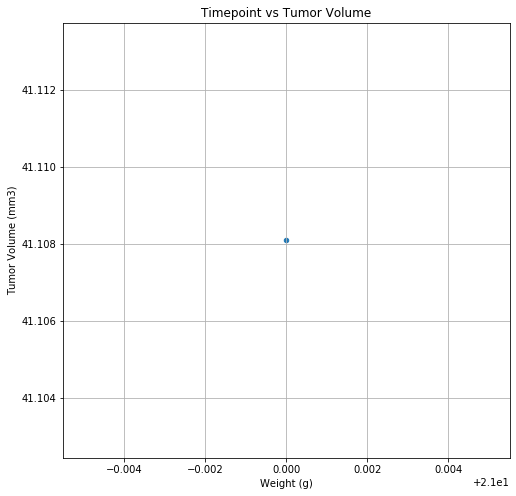

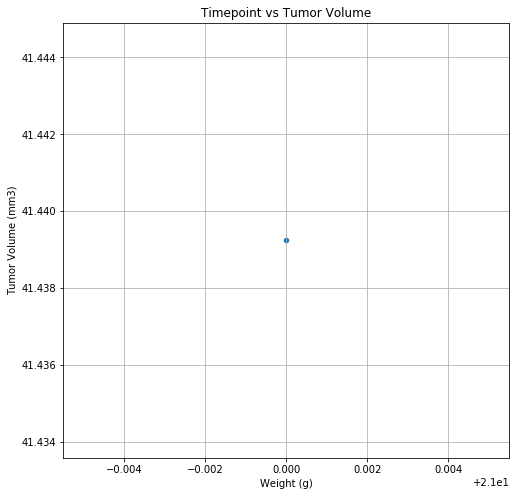

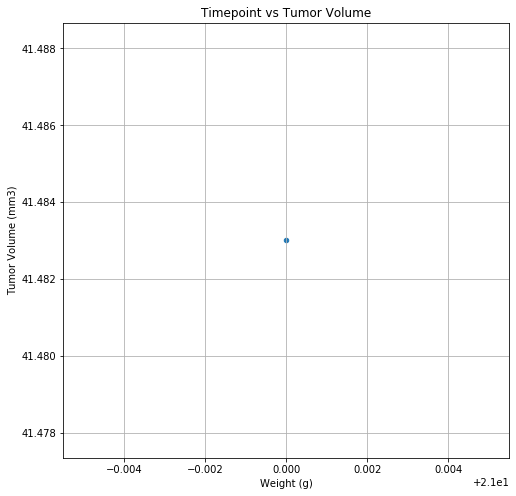

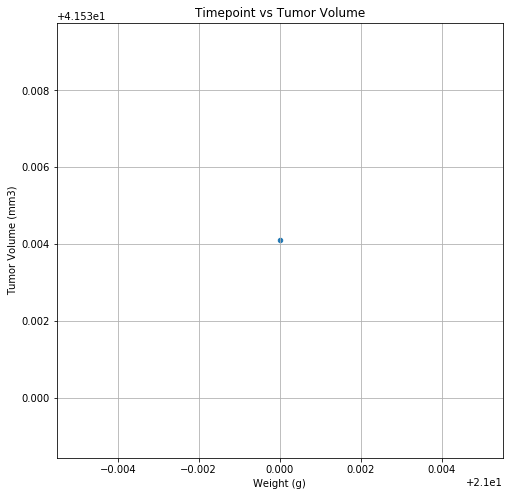

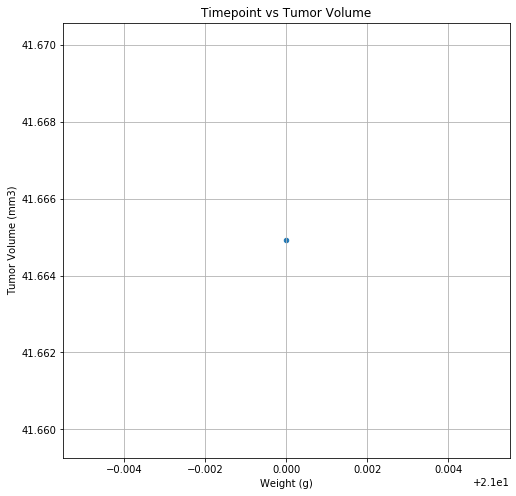

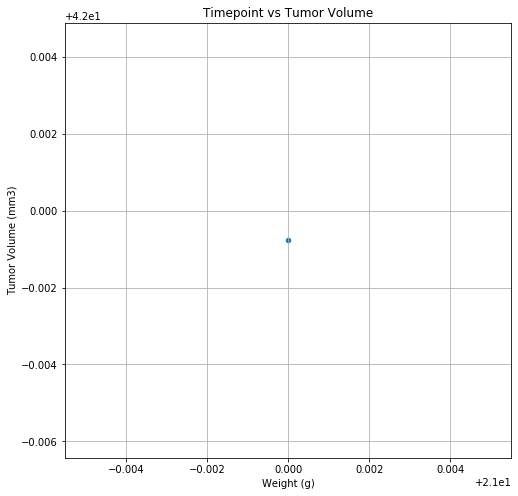

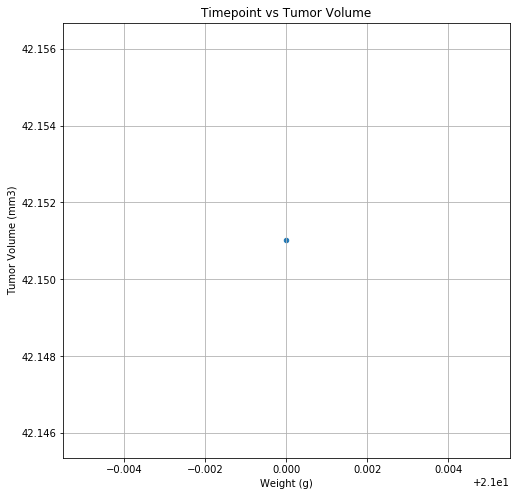

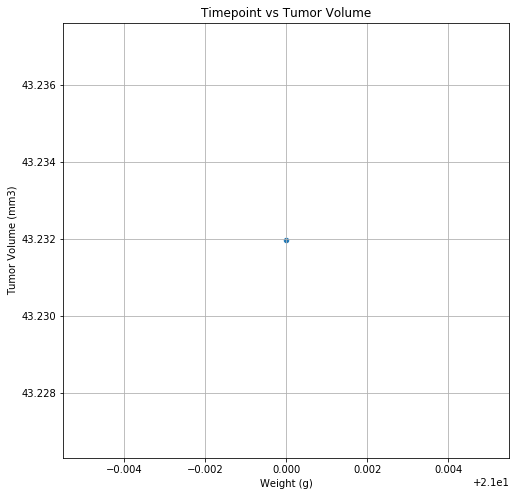

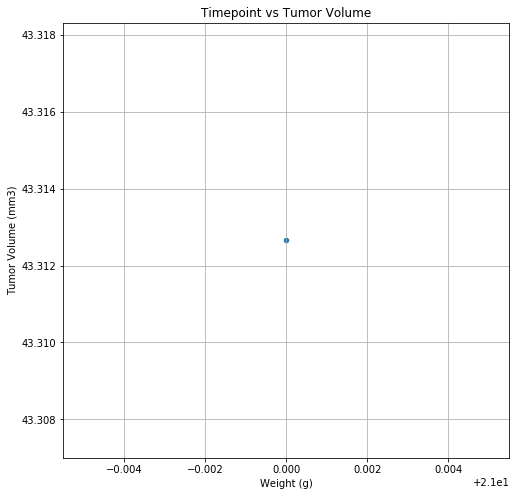

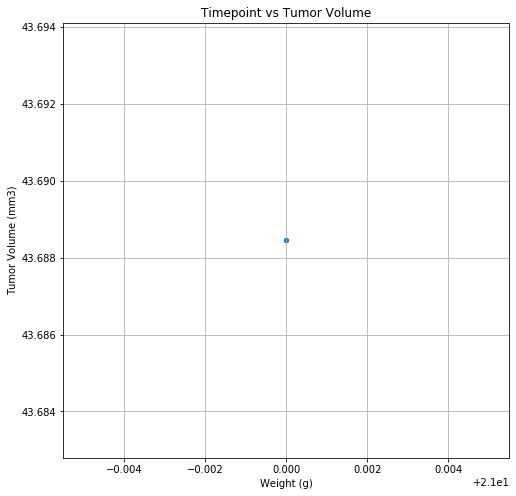

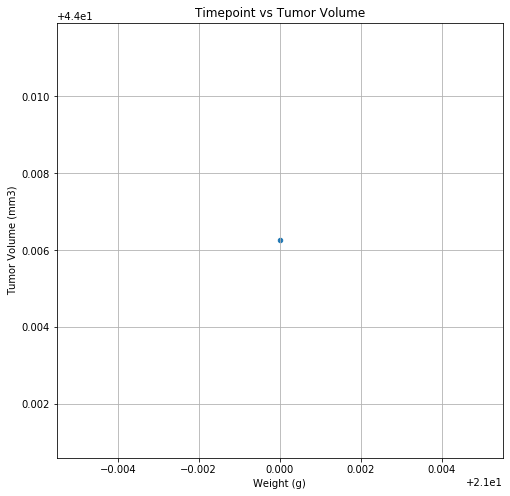

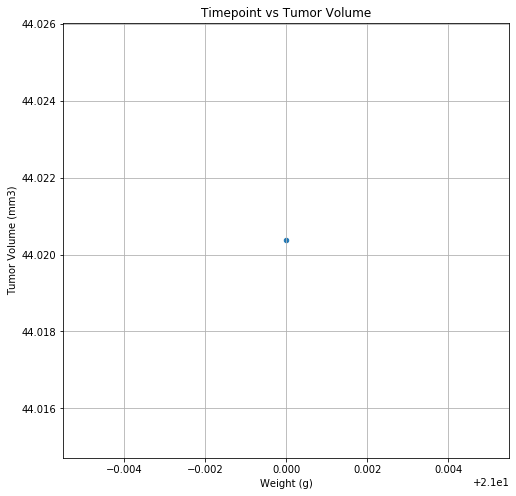

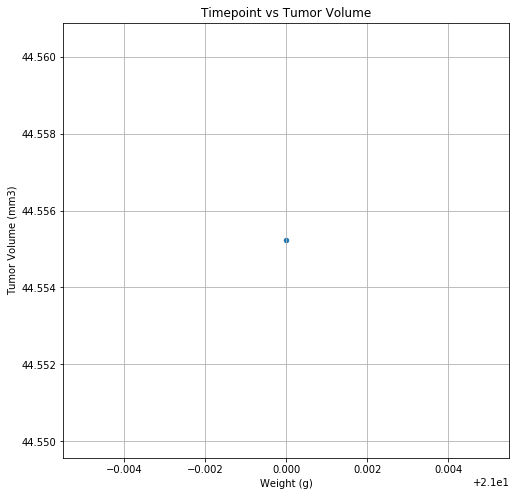

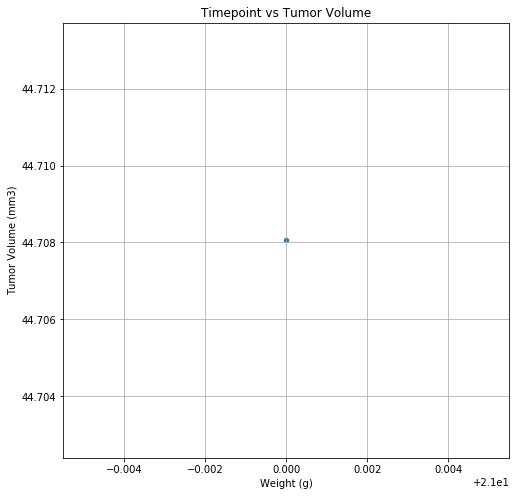

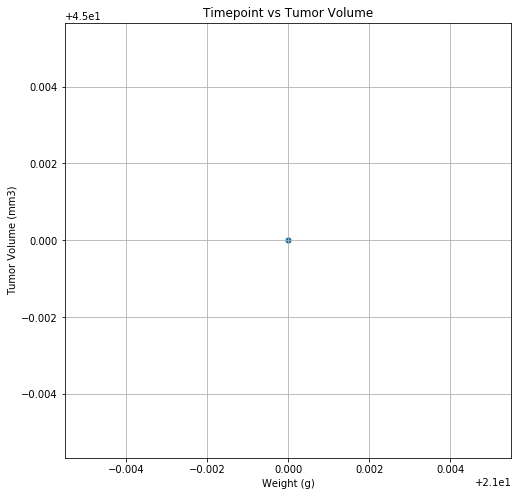

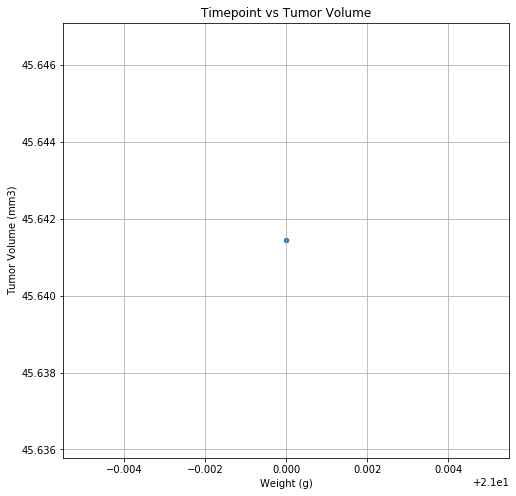

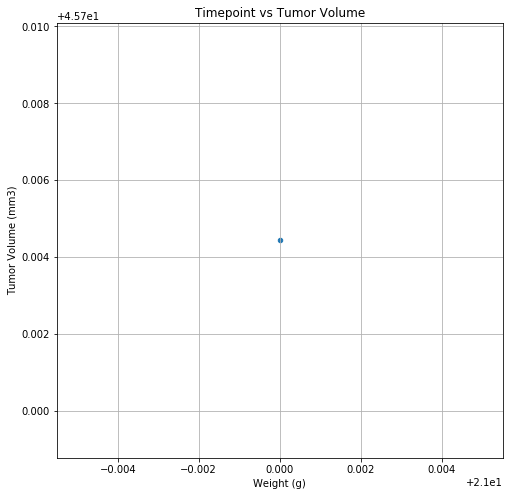

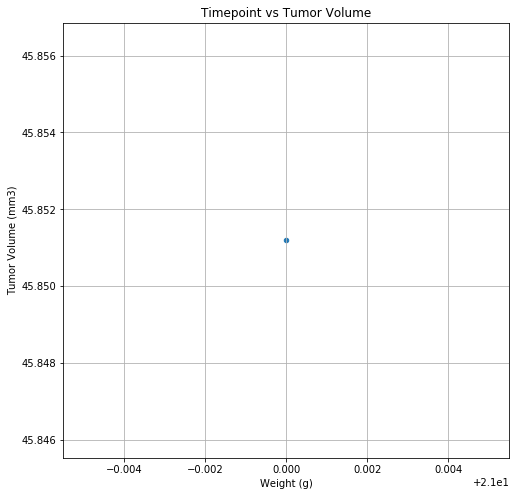

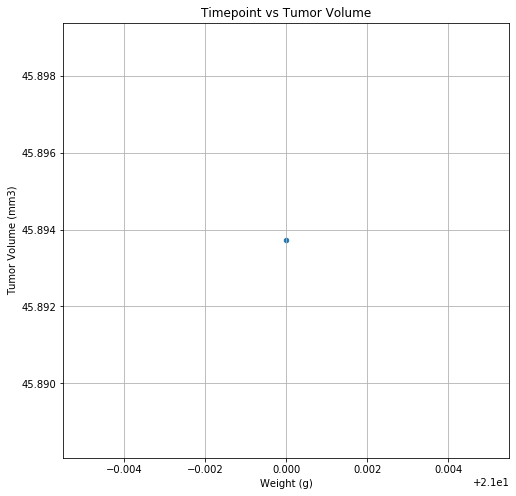

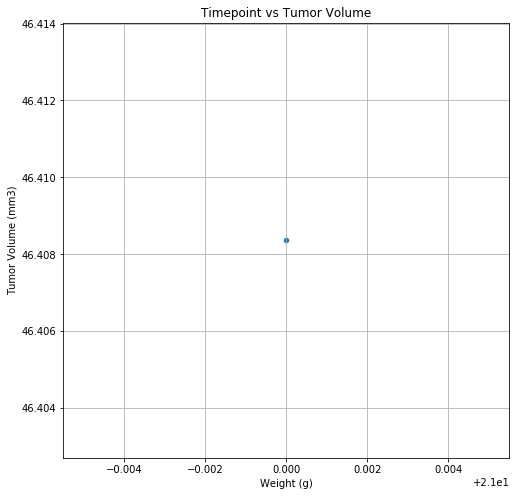

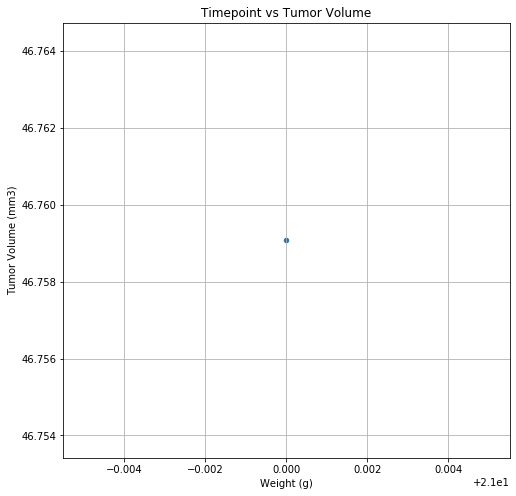

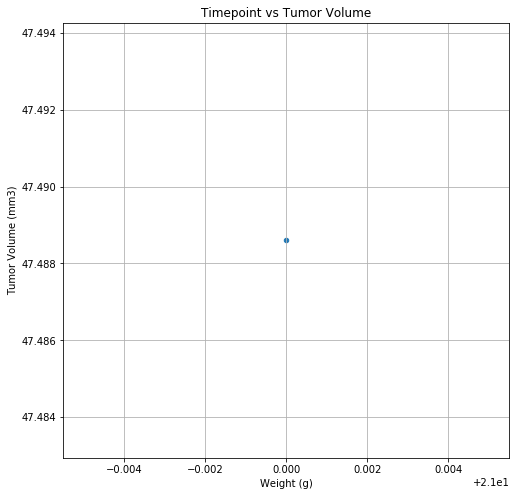

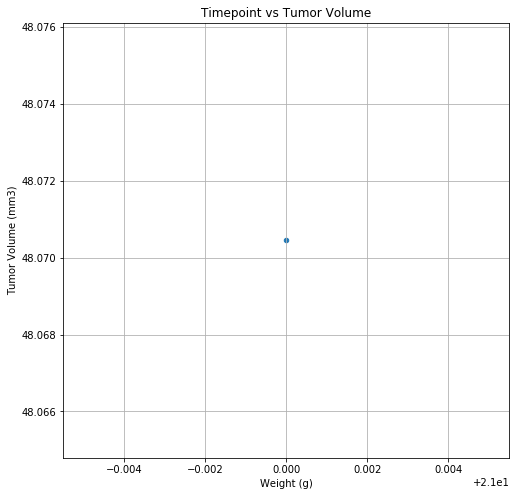

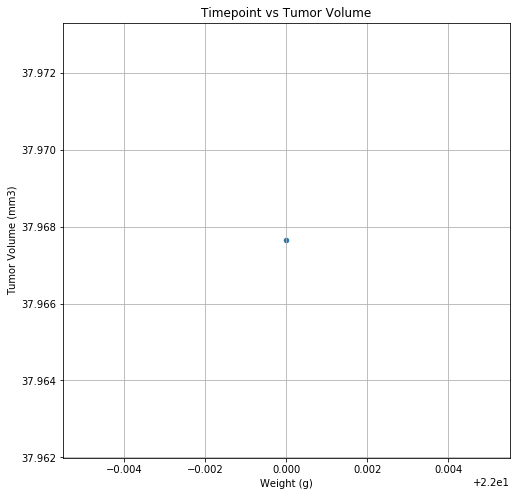

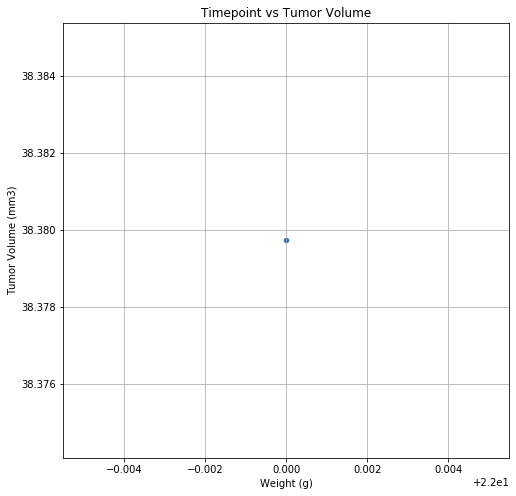

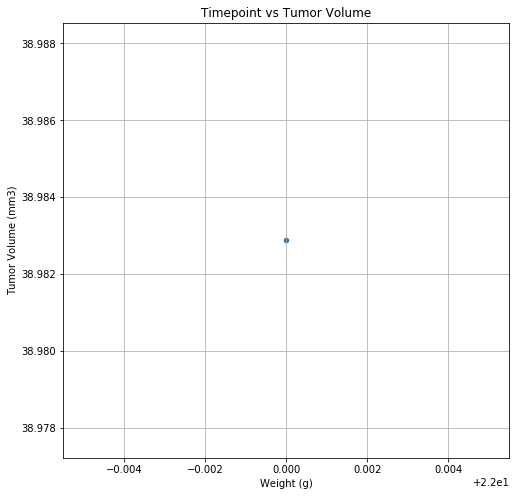

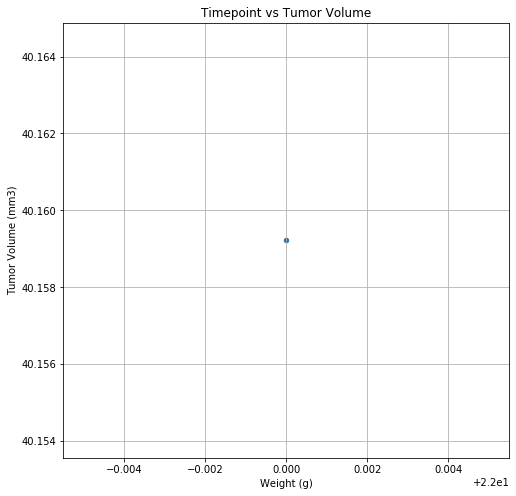

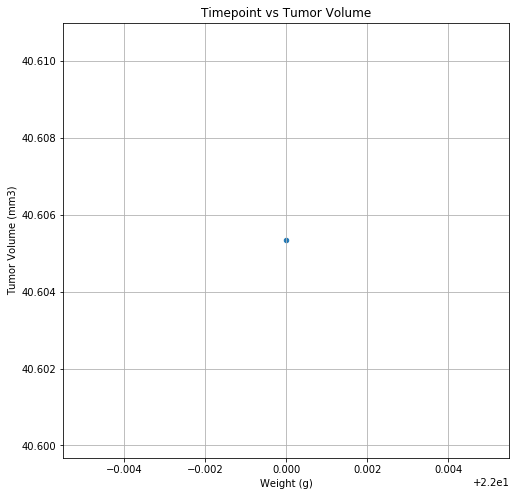

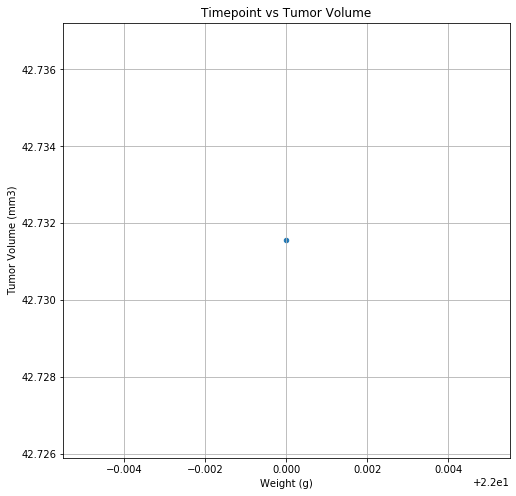

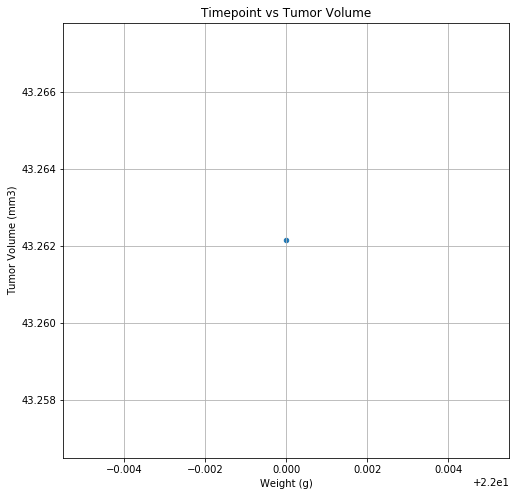

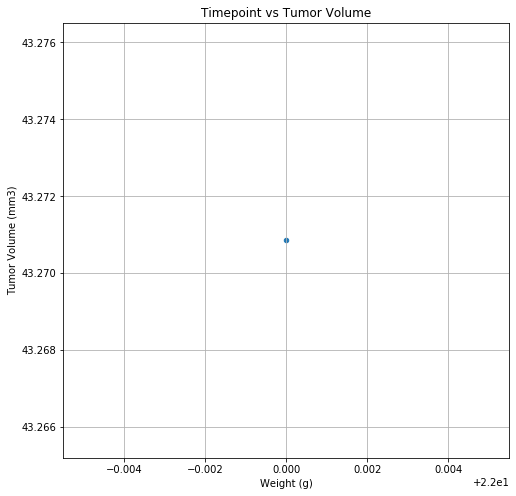

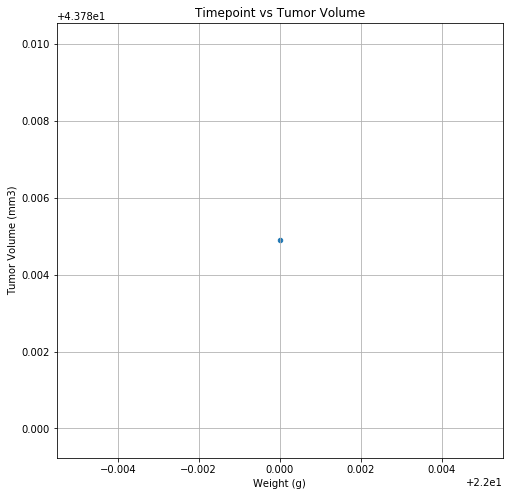

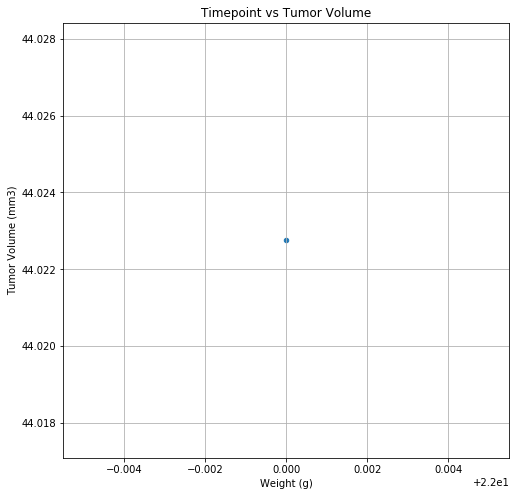

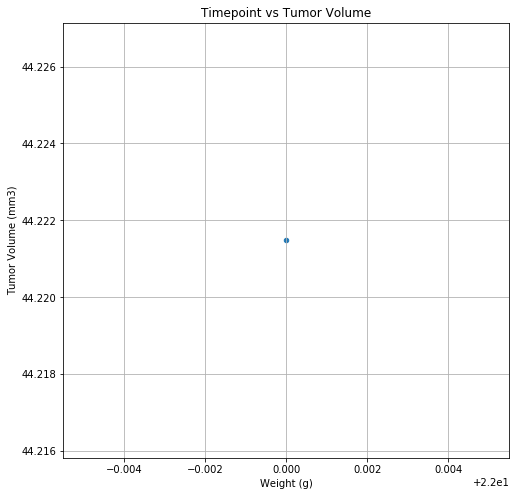

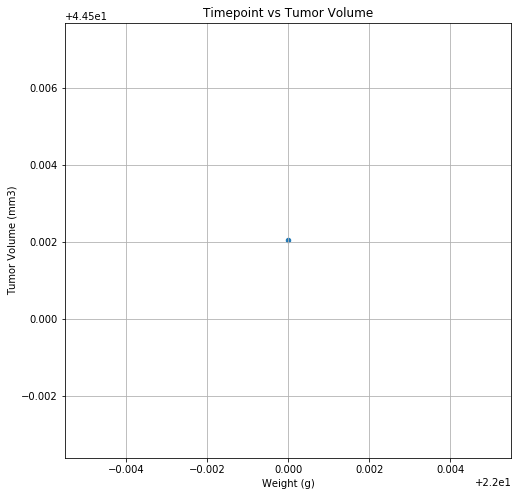

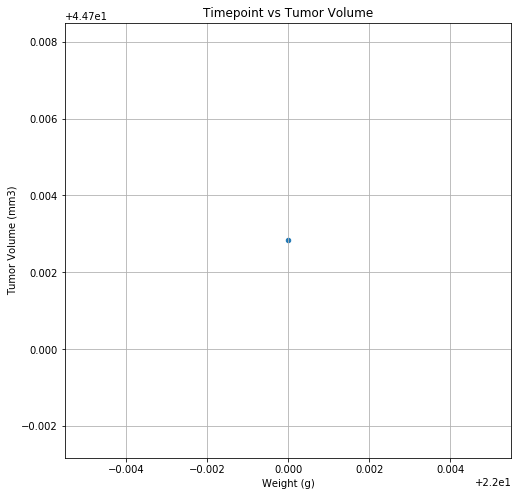

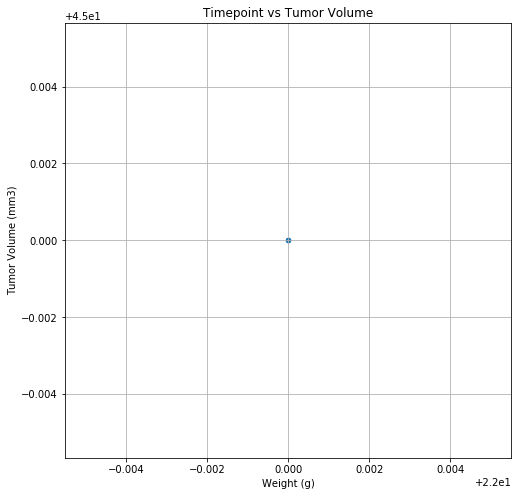

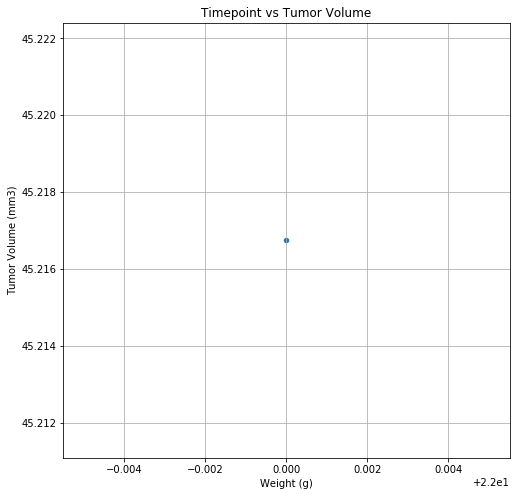

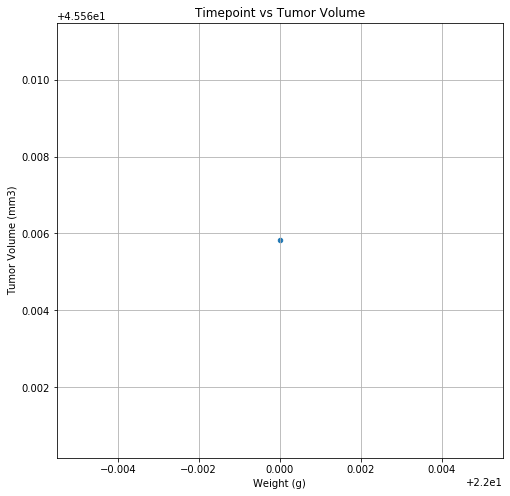

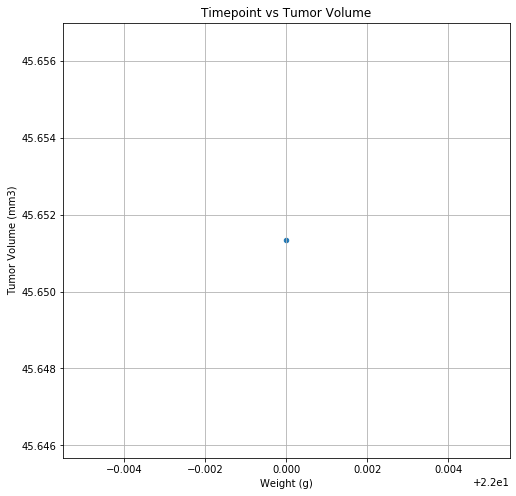

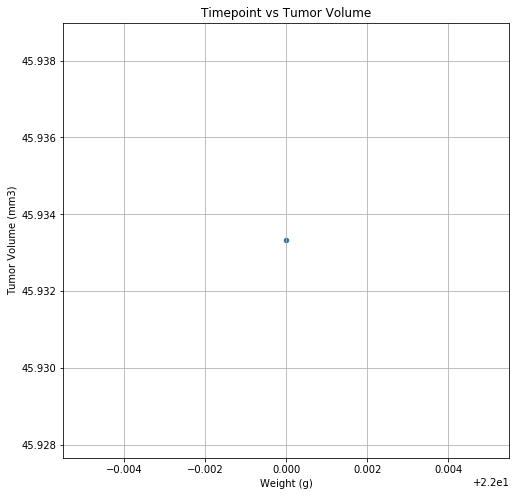

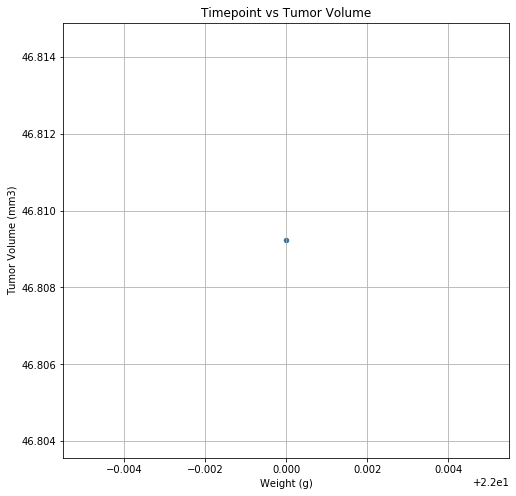

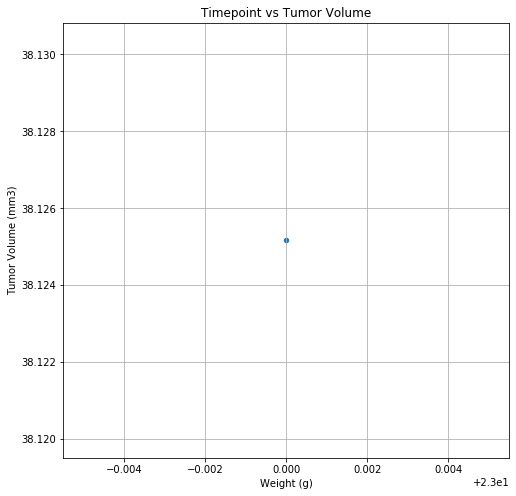

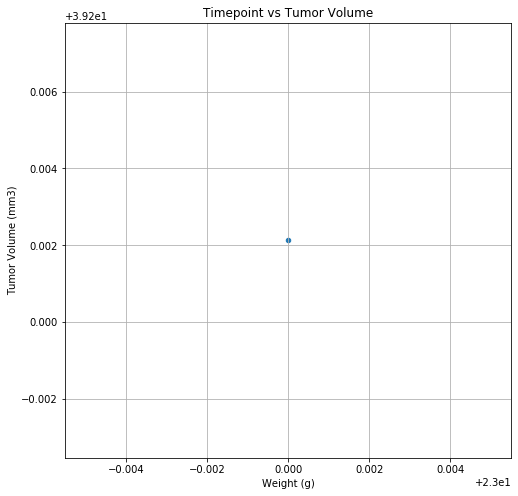

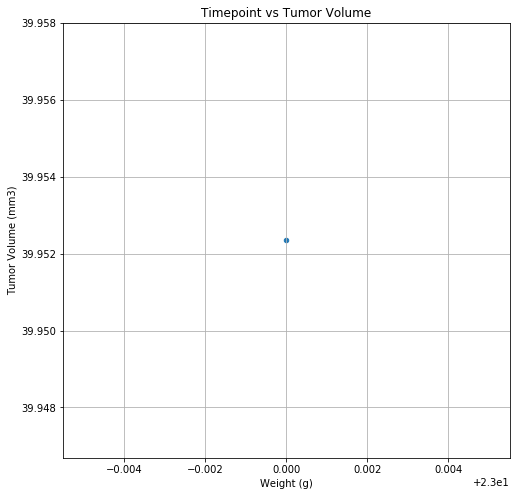

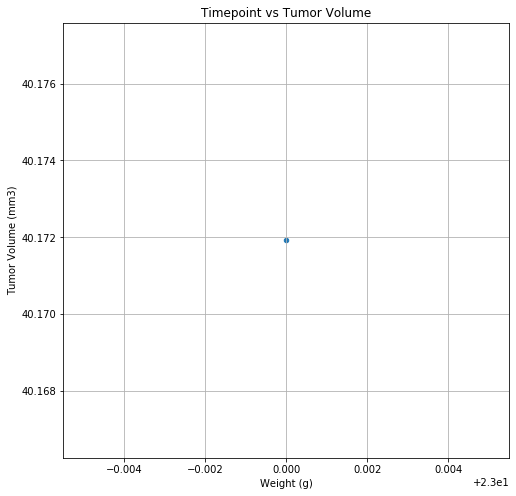

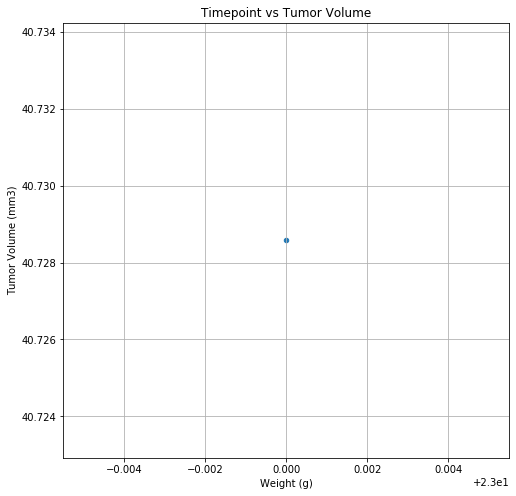

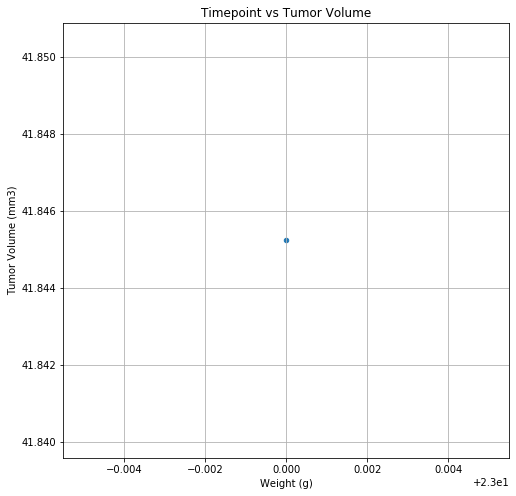

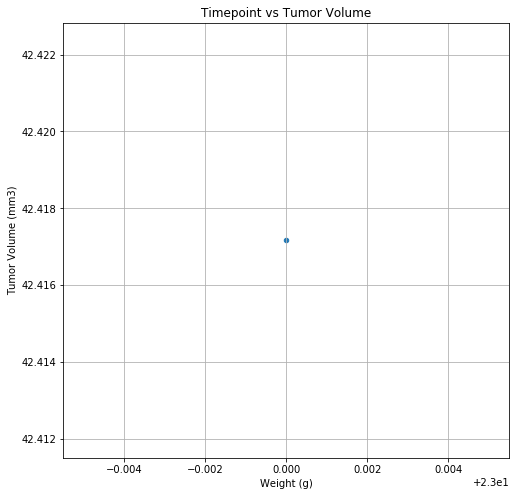

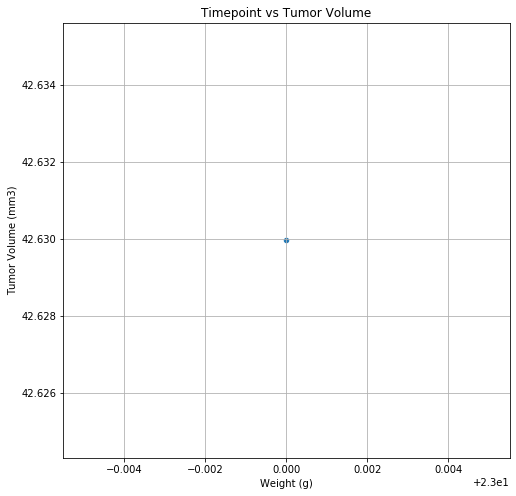

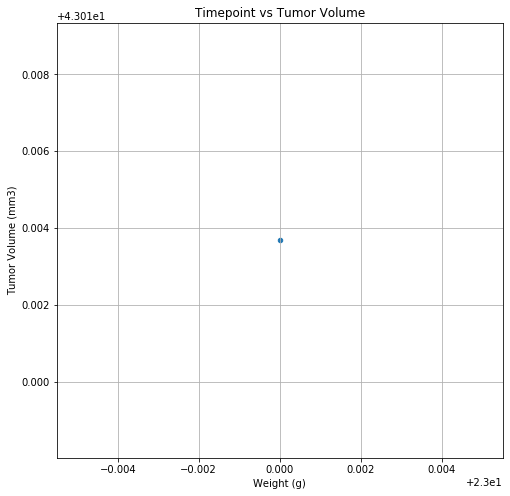

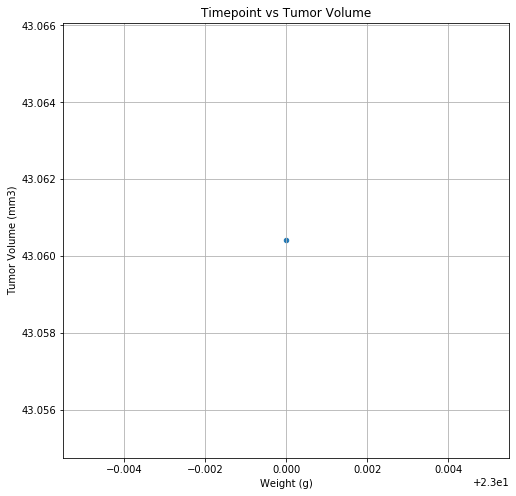

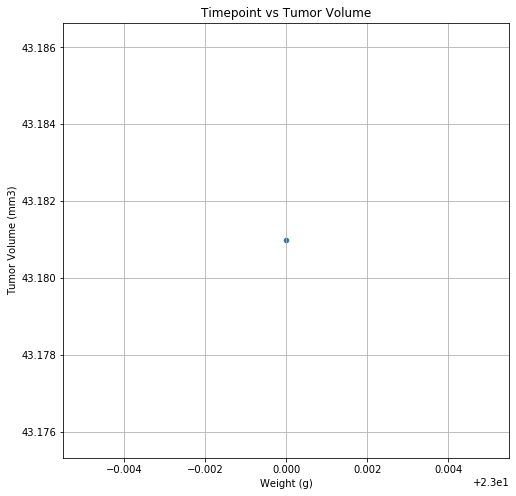

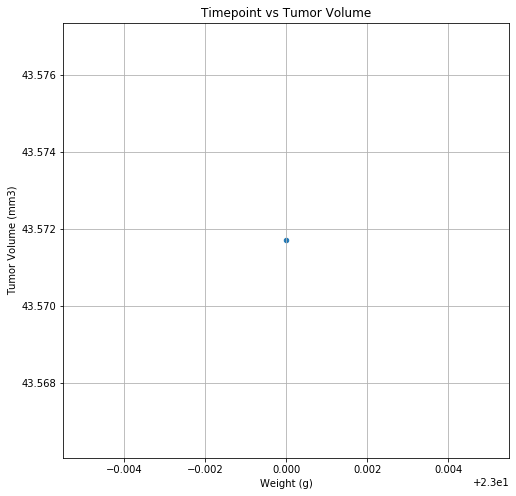

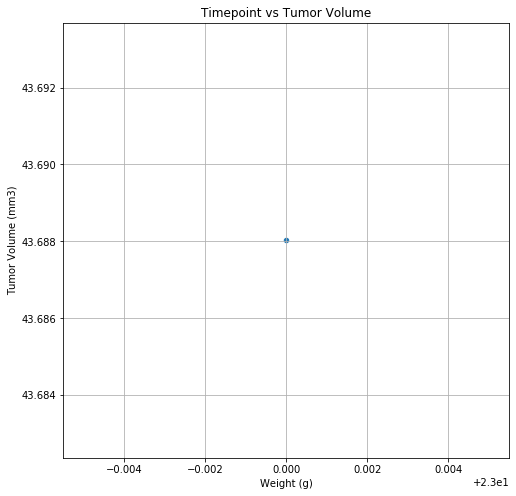

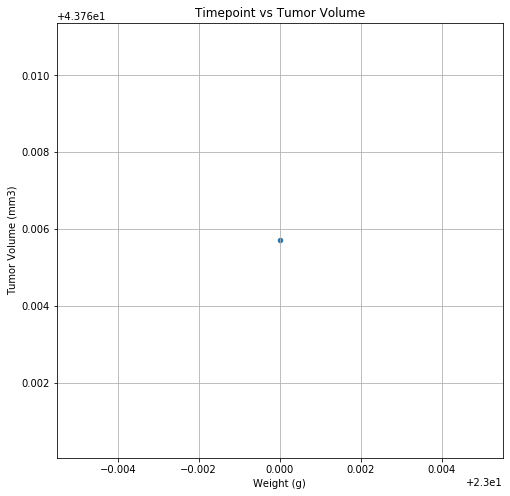

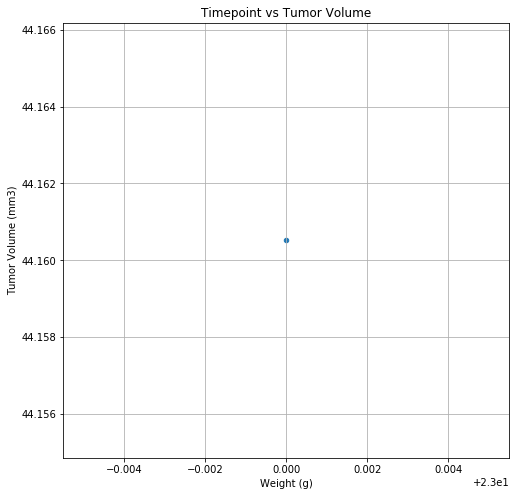

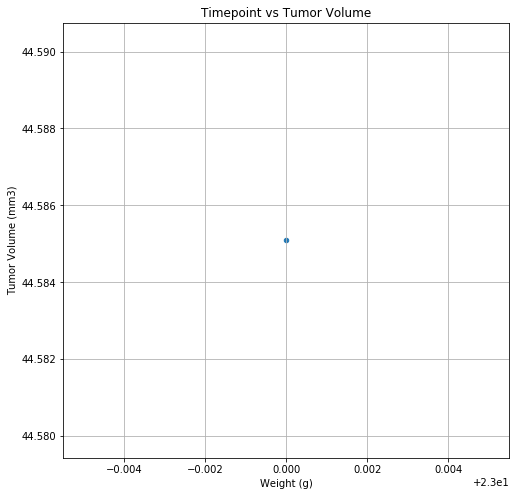

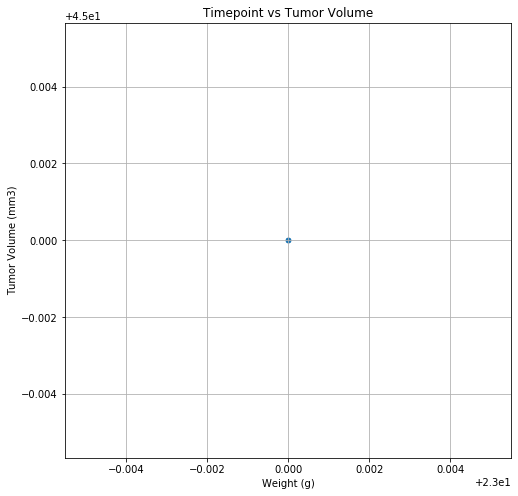

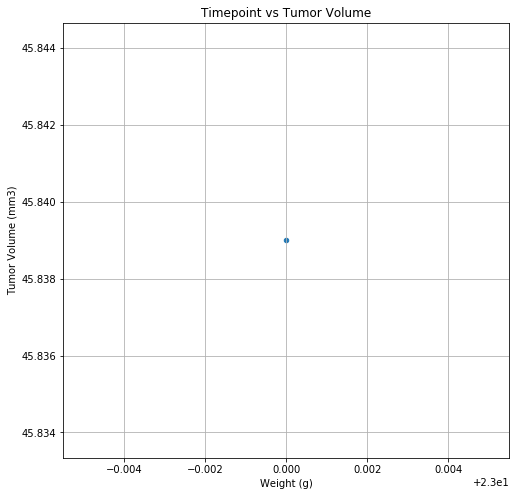

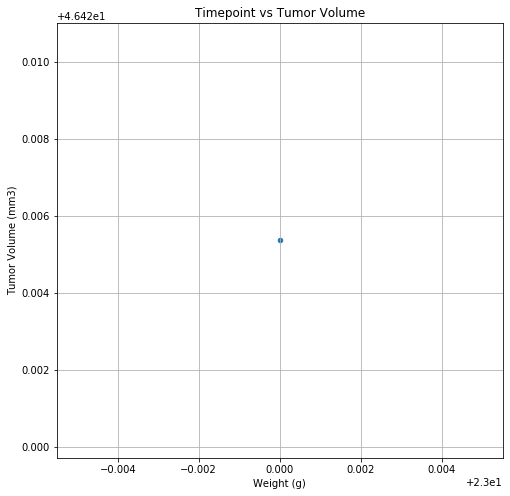

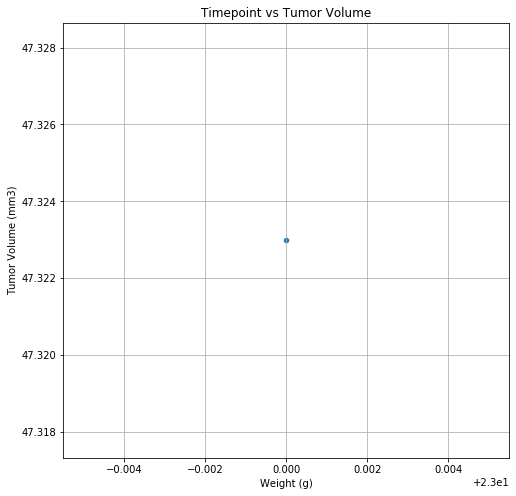

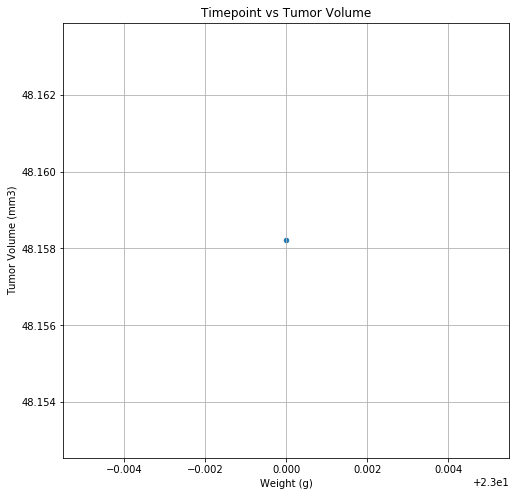

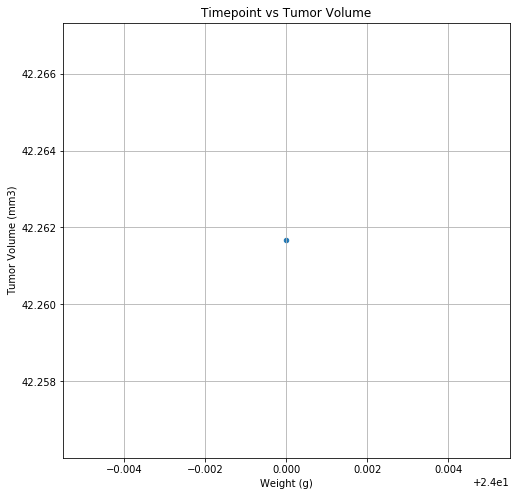

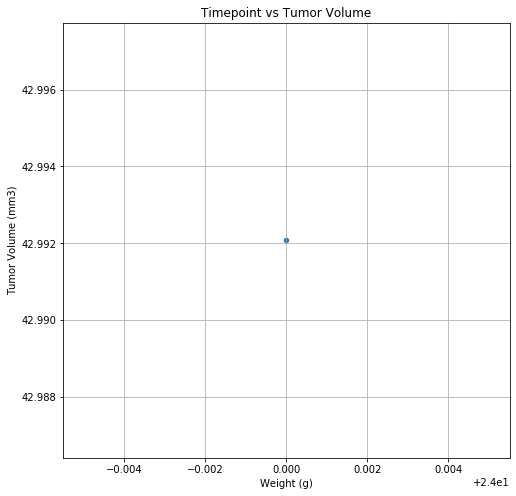

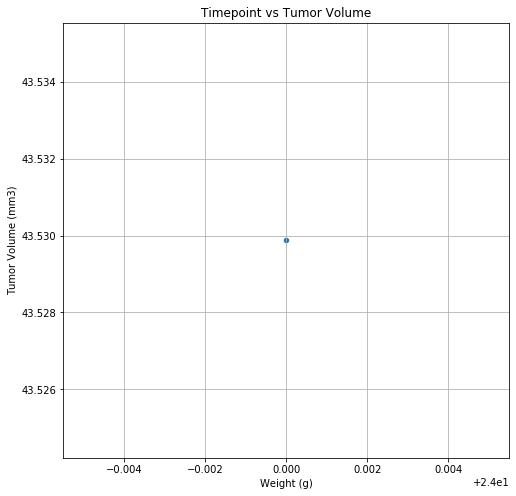

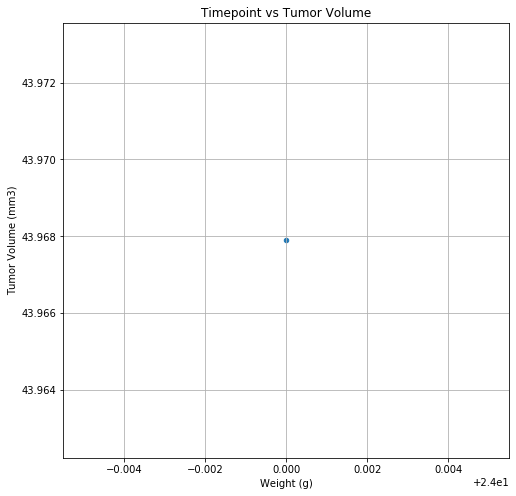

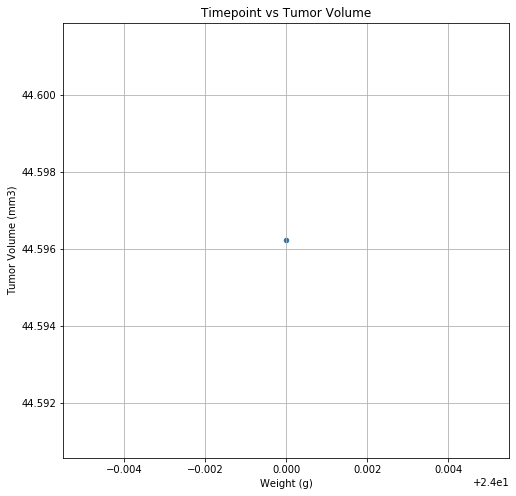

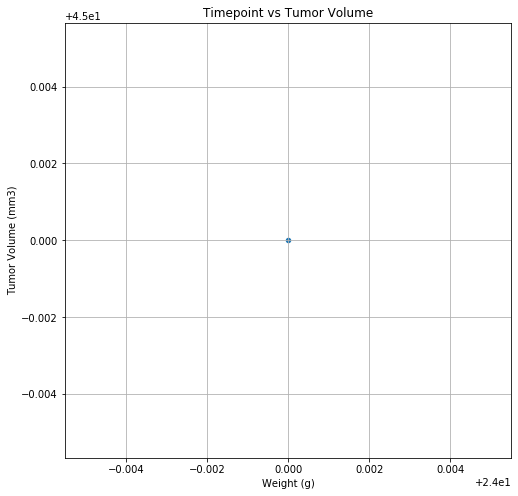

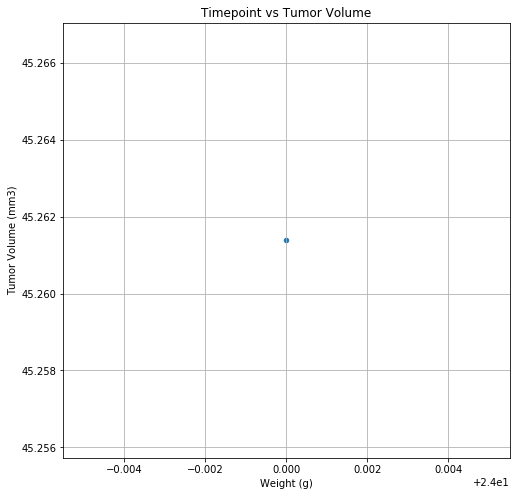

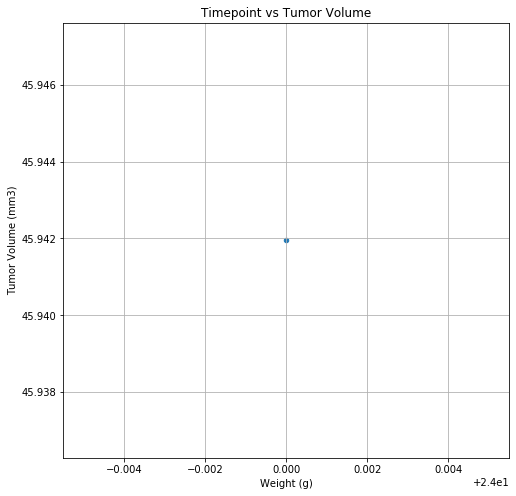

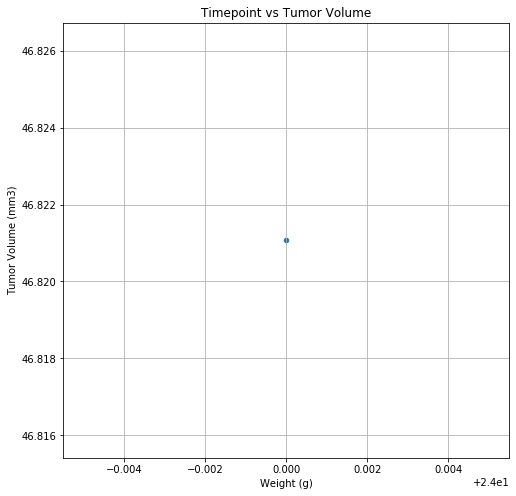

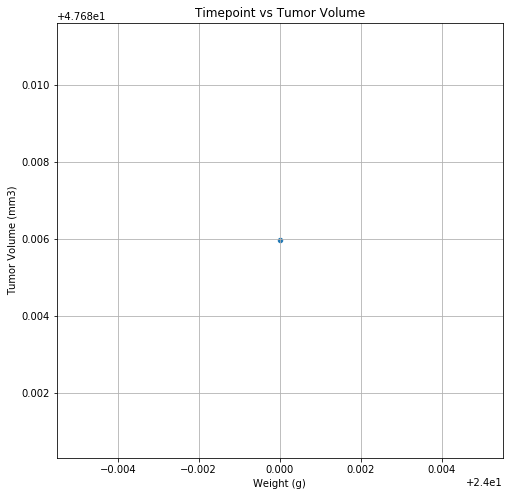

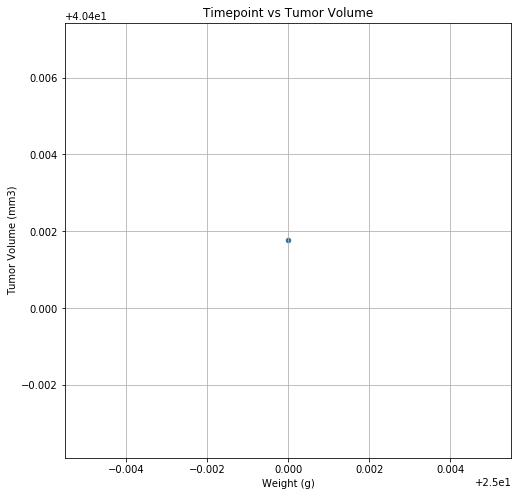

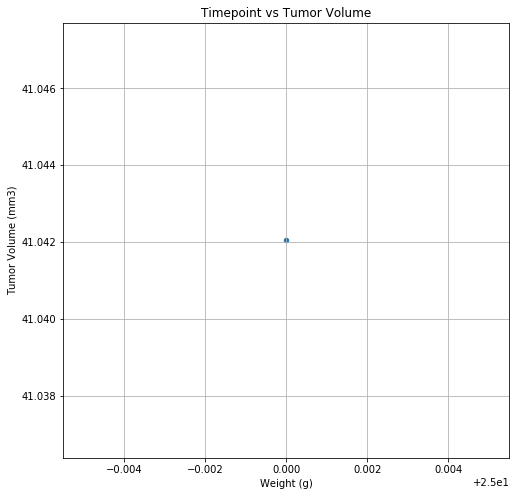

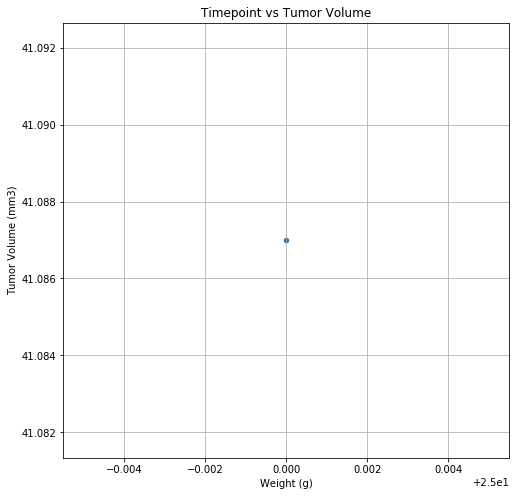

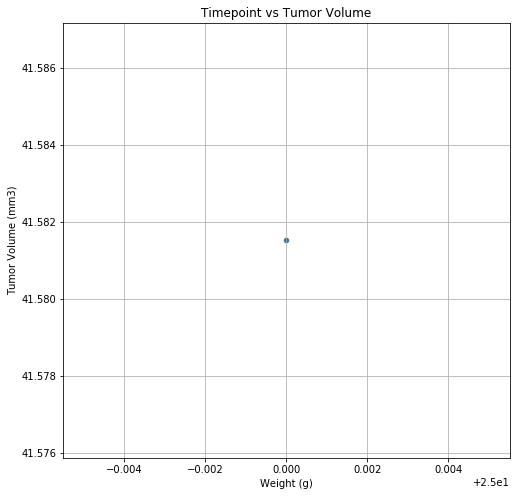

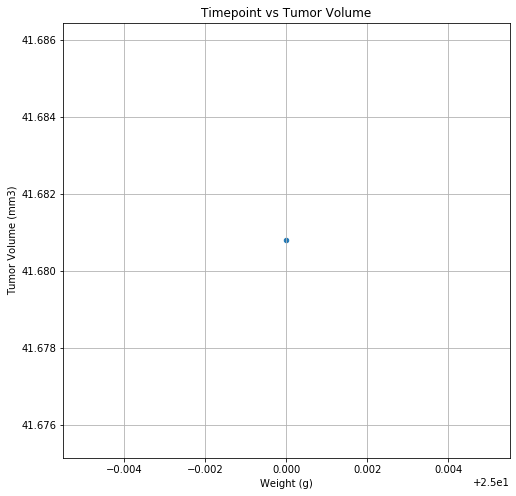

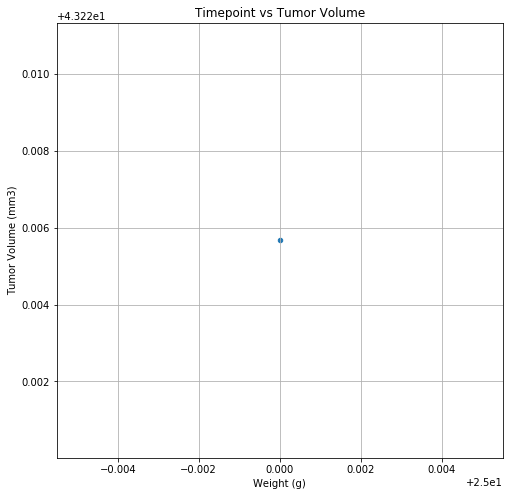

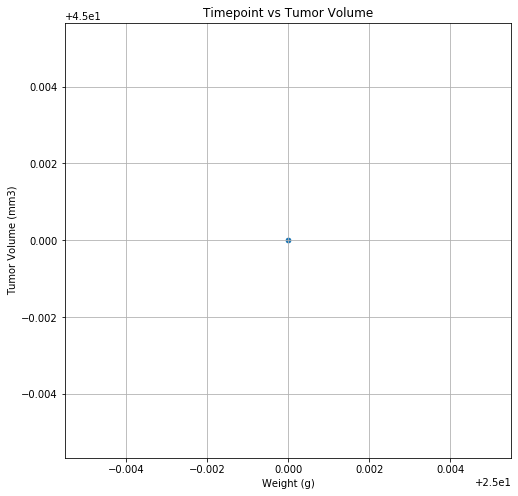

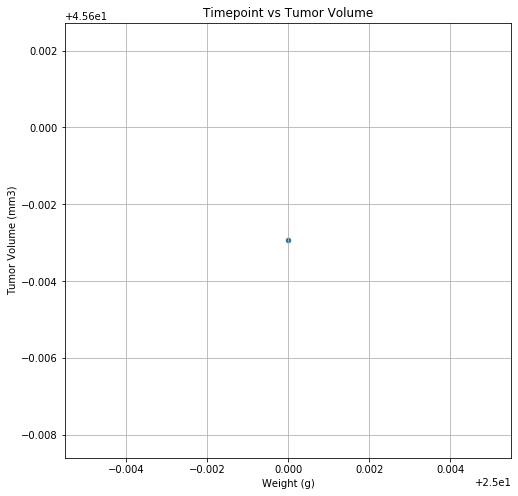

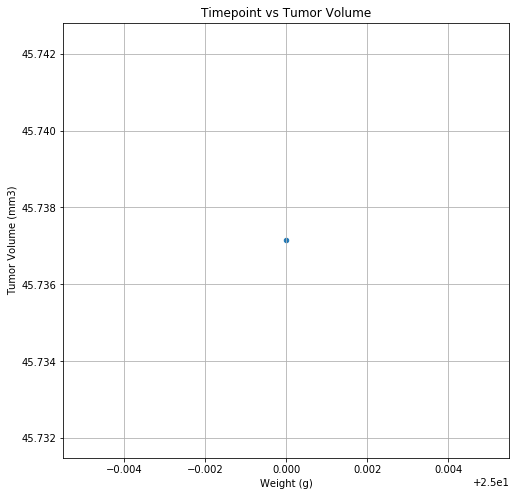

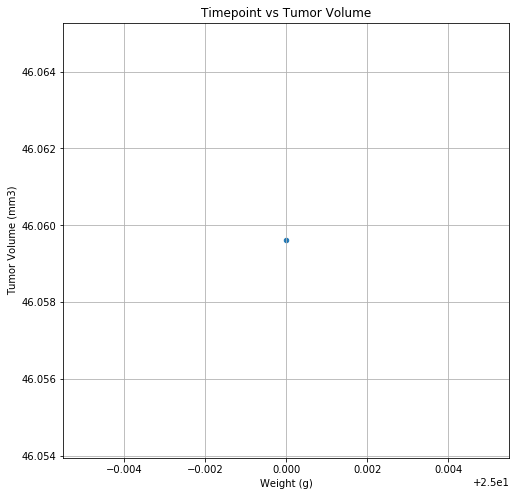

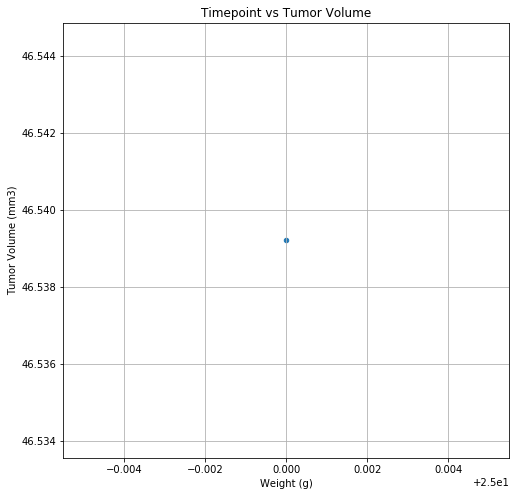

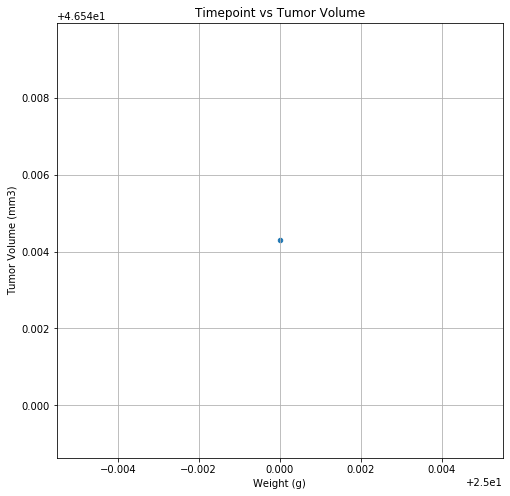

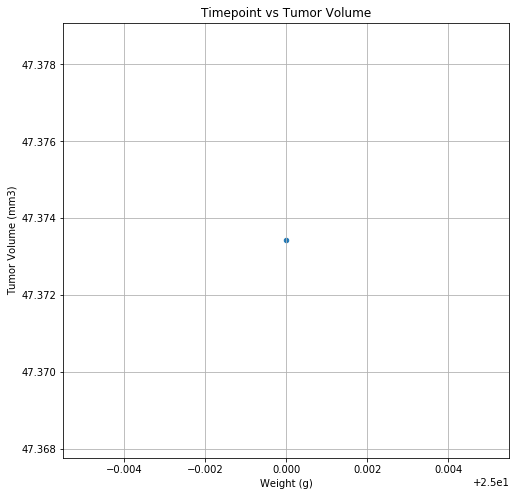

In [78]:
Capomulin_weight1.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Timepoint vs Tumor Volume")
plt.show()
#Capomulin_weight = results_Capomulin.groupby(['Weight (g)','Tumor Volume (mm3)'])

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen